In [268]:
#todo 
#references 
#make it look like a presentation

In [2]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
np.random.seed(0)
from scipy.integrate import odeint,solve_ivp


/opt/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [49]:
#import data 2012-2019 Italy sentinel
data = pd.read_excel('influenza_it.xlsx')
h1n1 = data['AH1N12009']
h3n2 = data['AH3']
H1N1 = h1n1.to_numpy()
H3N2 = h3n2.to_numpy()
data_n = pd.read_excel('it_non-sen.xlsx')
h1n1_n = data['AH1N12009']
h3n2_n = data['AH3']
H1N1_n = h1n1_n.to_numpy()
H3N2_n = h3n2_n.to_numpy()
spec = data['SPEC_PROCESSED_NB'].to_numpy() #specimen processed
norm_H1N1 = H1N1/sum(spec)
norm_H1N1_n = H1N1_n/sum(spec)
norm_H3N2 = H3N2/sum(spec)
norm_H3N2_n = H3N2_n/sum(spec)

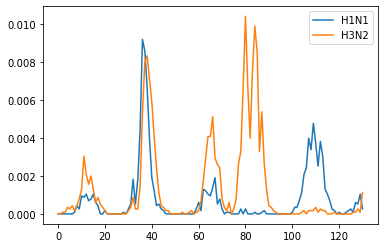

In [51]:
plt.plot(norm_H1N1,label = "H1N1")
plt.plot(norm_H3N2,label = "H3N2")
plt.legend()
plt.show()

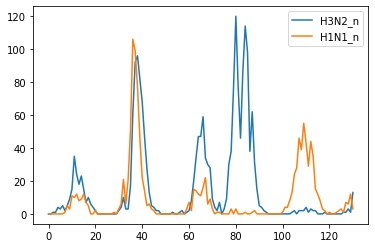

In [7]:
plt.plot(H3N2_n, label = 'H3N2_n')
plt.plot(H1N1_n, label = 'H1N1_n')
plt.legend()
plt.show()

In [252]:
# model
def SIRS(y, t, N, beta_1, beta_2, gamma1, gamma2, mu, c_12, c_21, L1,L2):
    
    S_1, I_1, R_1, S_2, I_2, R_2 = y
    
    dS_1dt = mu*N - c_21*beta_1*S_1*I_1/N - c_21*beta_2*S_1*I_2/N + R_1/L1 - mu*S_1 - alpha 
    dI_1dt = beta_1*S_1*I_1/N  - gamma1*I_1 - mu*I_1 +alpha
    dR_1dt = gamma1*I_1 - R_1/L1 - mu*R_1
    dS_2dt = mu*N - c_12*beta_1*S_2*I_1/N - c_12*beta_2*S_2*I_2/N + R_2/L2 - mu*S_2 - alpha
    dI_2dt = beta_2*S_2*I_2/N  - gamma2*I_2 - mu*I_2 +alpha
    dR_2dt = gamma2*I_2 - R_2/L2 - mu*R_2
    
    return dS_1dt, dI_1dt, dR_1dt, dS_2dt, dI_2dt, dR_2dt
def plot_model(solution):
    
    S_1, I_1, R_1, S_2, I_2, R_2 = solution
    plt.figure(figsize=(10, 6))
    plt.plot(t, S_1, label='S1(t)')
    plt.plot(t, I_1, label='I1(t)')
   #plt.plot(t, R_1, label='R1(t)')
    plt.plot(t, S_2, label='S2(t)')
    plt.plot(t, I_2, label='I2(t)')
   # plt.plot(t, R_2, label='R2(t)')
    plt.xlabel('Days')
    plt.ylabel('Proportion of Population')
    plt.title('2-Strain SIRS Model with Cross-Immunity and Waning of Immunity')
    plt.legend()
    plt.show()

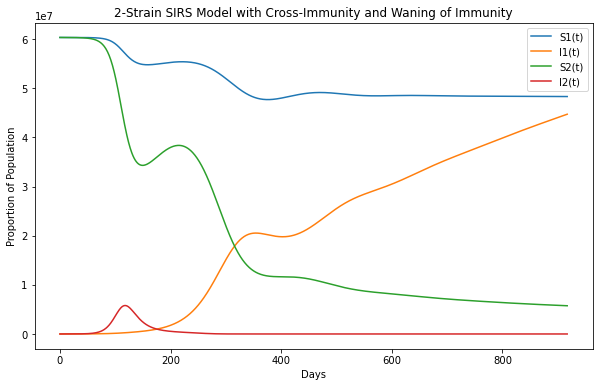

In [253]:
# Initial conditions
N = 60326250  # total population
I_1 = 1000  # initial infected of strain 1
R_1 = 20  # initial recovered of strain 1
I_2 = 50  # initial infected of strain 2
R_2 = 10  # initial recovered of strain 2
S_1 = N - I_1 - I_2  # initial number of susceptible individuals
S_2 = N - I_1 - I_2 
# Initial conditions vector
y0 = S_1, I_1, R_1, S_2, I_2, R_2
# Simulation time
t_max = 131*7 # days
t = np.linspace(0, t_max, t_max+1)


# Parameters
beta_1 = 0.2  # transmission rate of strain 1
beta_2 = 0.3  # transmission rate of strain 2
D1 = 2.64 #days
D2 = 3.03 #mean infect period
gamma_1 = 0.15 # recovery rate should be 1/D1 
gamma_2 = 0.2
m = np.mean([9.014,8.839,8.597,8.354,8.112,7.869,7.627,7.509,10.045,10.121,10.192,10.262,10.333,10.403,10.474,10.566])
mu = m/1000  # birth rate = death rate (defined as number of births/deaths per 1000 population)
c_12 = 0.6  # cross-immunity from strain 1 to strain 2  
c_21 = 0.09 # cross-immunity from strain 2 to strain 1
L_1 = 3.12*360 #year*days immunity period
L_2 = 2.28*360 #waning rate = 1/L1    
alpha = 0.1 * N//100000 #0.1 per 100000 - travel parameter


# Integrate the SIRS equations over the time grid, t

sol = odeint(SIRS, y0, t, args=(N, beta_1, beta_2, gamma_1, gamma_2, mu, c_12, c_21, L_1,L_2))
S_1, I_1, R_1, S_2, I_2, R_2 = sol.T
plot_model(sol.T)



In [254]:

def incidence(I1,I2):
    inc1 = np.abs(np.diff(I1))/N #normalized
    inc2 = np.abs(np.diff(I2))/N
    return inc1, inc2
inc1,inc2 = incidence(I_1,I_2)


In [255]:
def compare(inc1, inc2):
    inc1_week = []
    inc2_week = []
    for i in range(int(len(inc1)/7)):
        a = 0 
        b = 0 
        for j in range(0,7):
            a = a+ inc1[i*j]
            b = b + inc2[i*j]
        inc1_week.append(a*0.227)
        inc2_week.append(b*0.193)

    plt.plot(inc1_week,label='simulation')
    plt.plot(norm_H1N1, label = 'data')
    plt.legend()
    plt.xlabel('weeks')
    plt.ylabel('ratio of infected')
    plt.title("Simulation vs data of H1N1")
    plt.show()


    plt.plot(inc2_week,label='simulation')
    plt.plot(norm_H3N2, label = 'data')
    plt.legend()
    plt.xlabel('weeks')
    plt.ylabel('ratio of infected')
    plt.title('Simulation vs data of H3N2')
    plt.show()

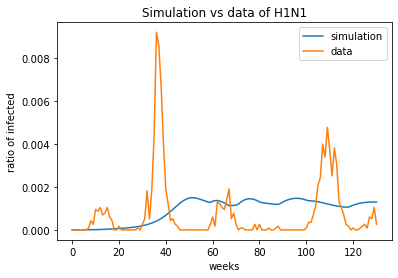

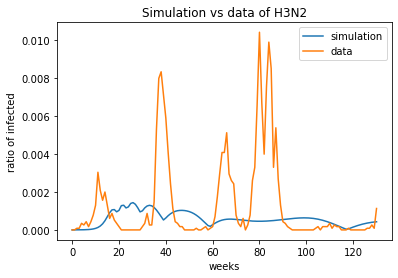

In [256]:
compare(inc1,inc2)

In [257]:
c12s = np.linspace(0.8,0.95,5)
c21s = np.linspace(0.1,0.2,5)
beta1s = np.linspace(0.2,0.35,5)
beta2s = np.linspace(0.3,0.8,5)
gamma1s = np.linspace(0.15,0.16,5)
gamma2s = np.linspace(0.1,0.26,5)
L1s = np.linspace(3*360,7*360,5)
L2s = np.linspace(1*360,5*360,5)
#params = zip(c12s,c21s,gamma1s,gamma2s,beta1s,beta2s,L1s,L2s)

C12 is 0.8 c21 is 0.1


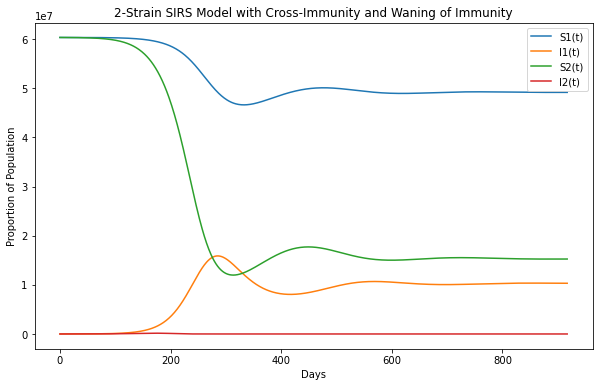

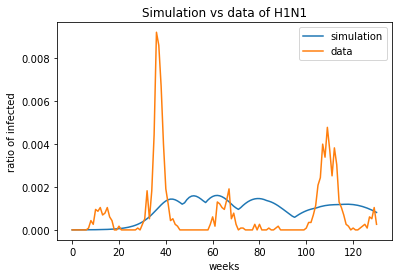

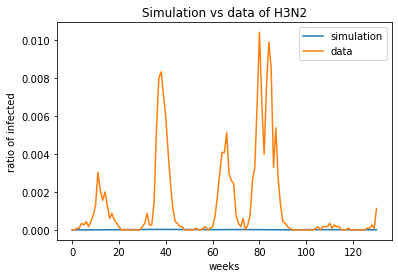

C12 is 0.8 c21 is 0.125


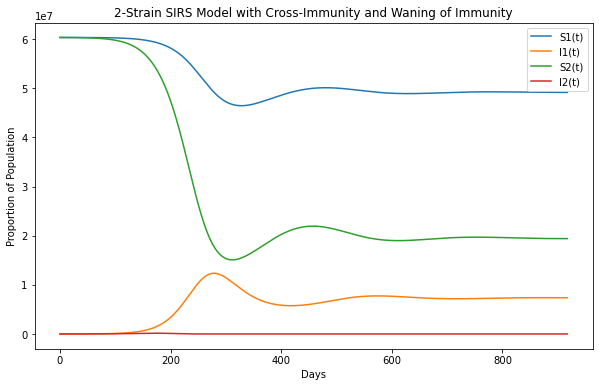

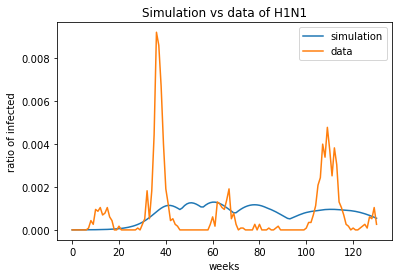

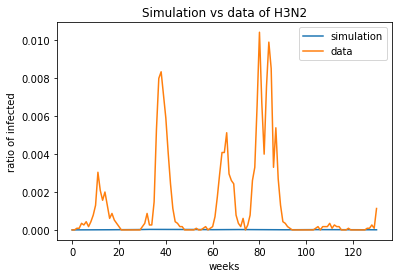

C12 is 0.8 c21 is 0.15000000000000002


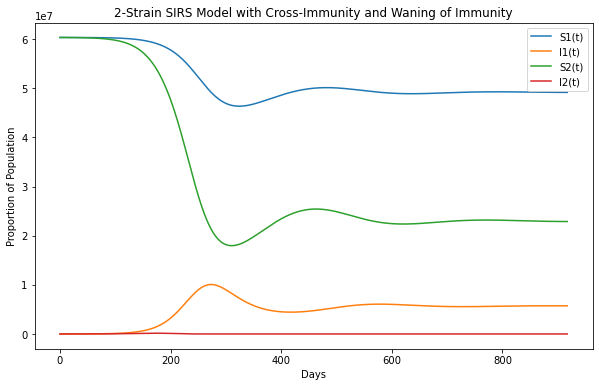

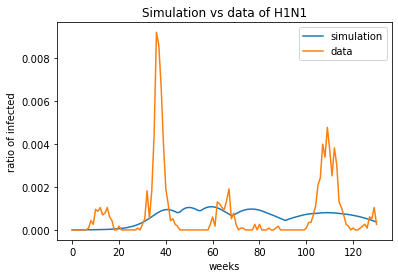

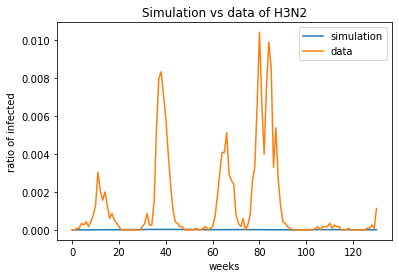

C12 is 0.8 c21 is 0.17500000000000002


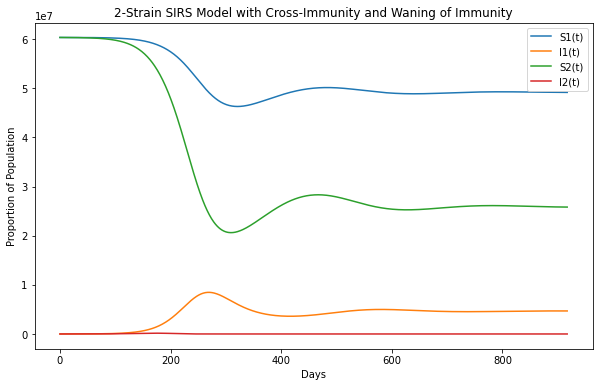

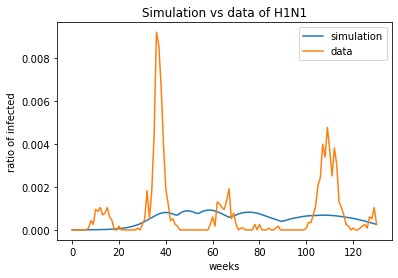

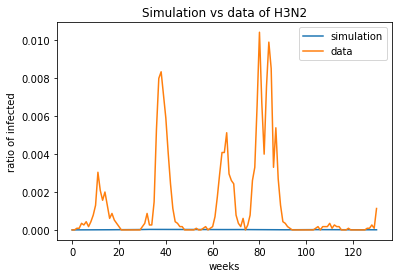

C12 is 0.8 c21 is 0.2


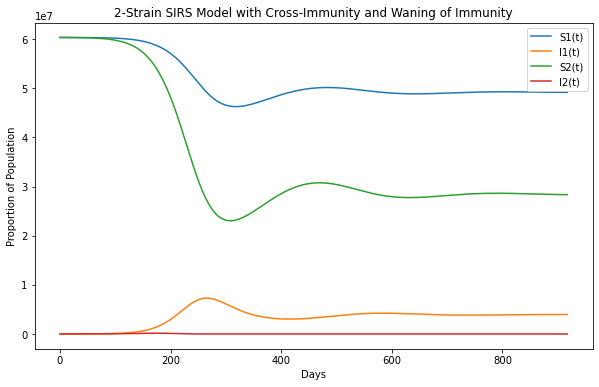

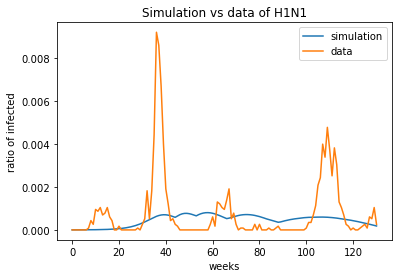

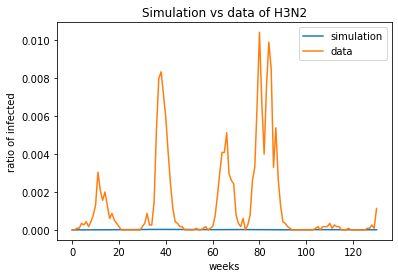

C12 is 0.8375 c21 is 0.1


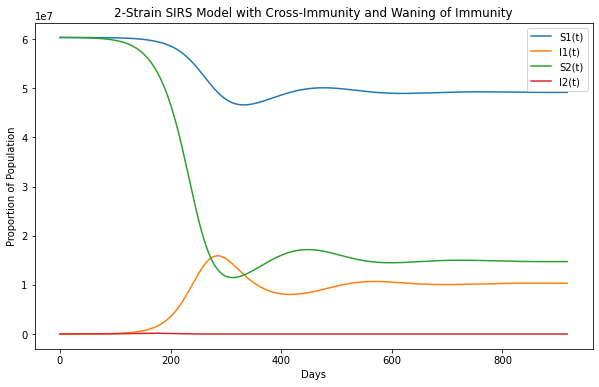

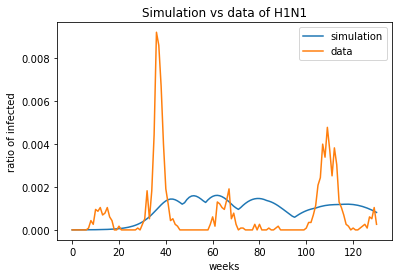

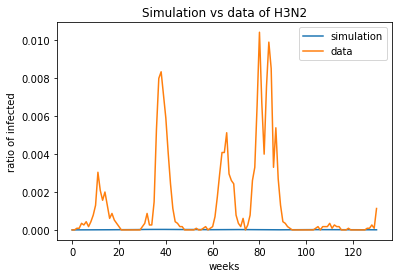

C12 is 0.8375 c21 is 0.125


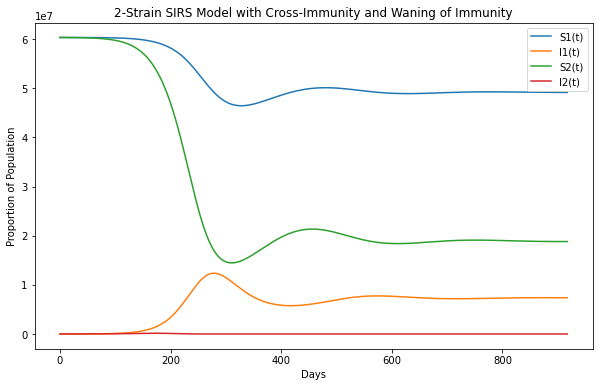

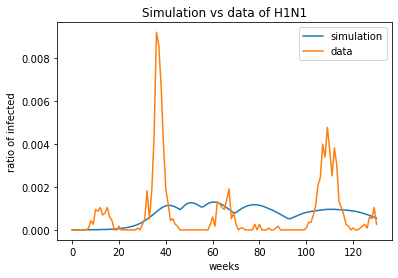

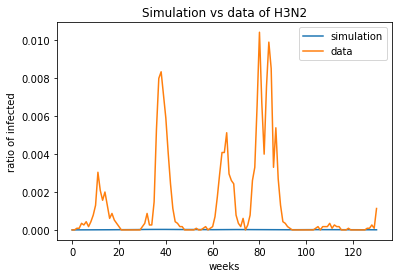

C12 is 0.8375 c21 is 0.15000000000000002


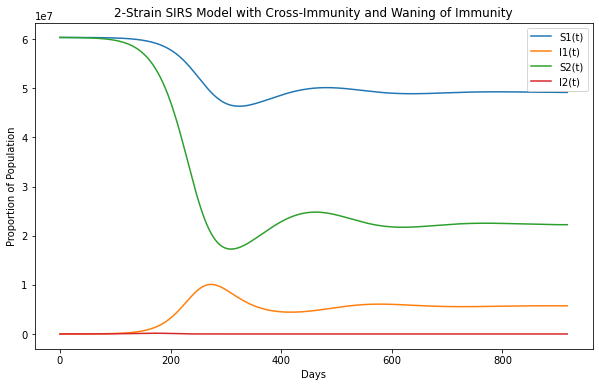

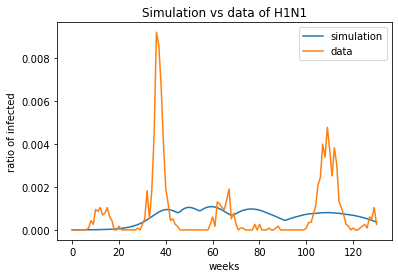

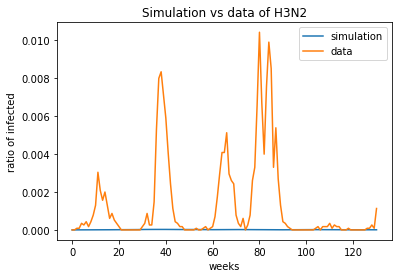

C12 is 0.8375 c21 is 0.17500000000000002


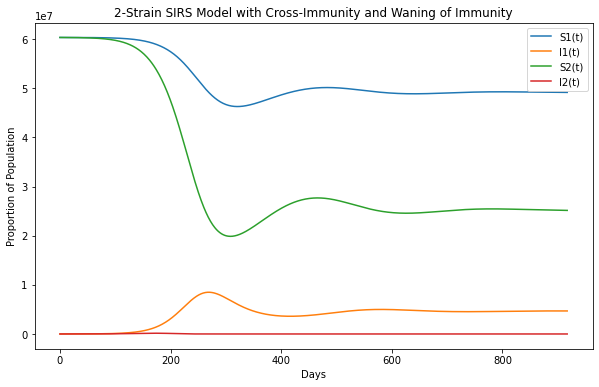

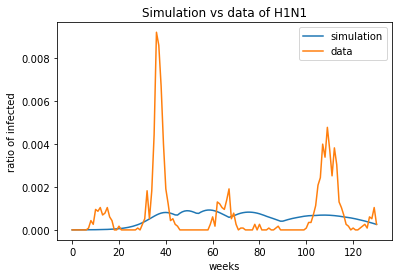

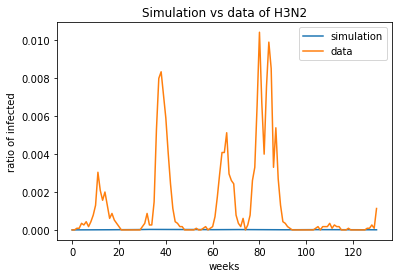

C12 is 0.8375 c21 is 0.2


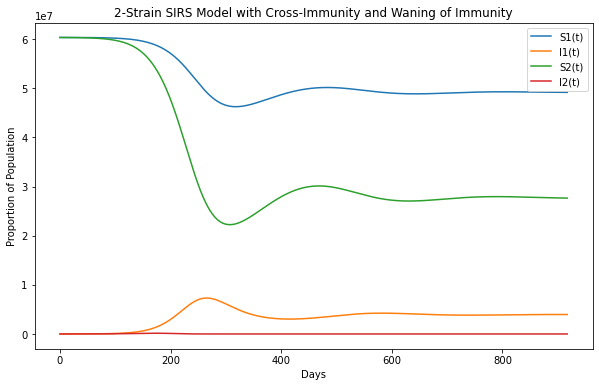

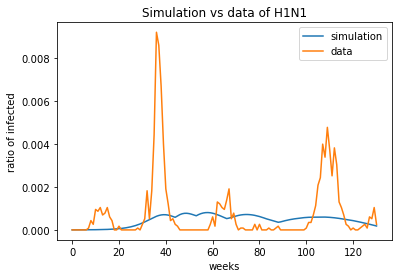

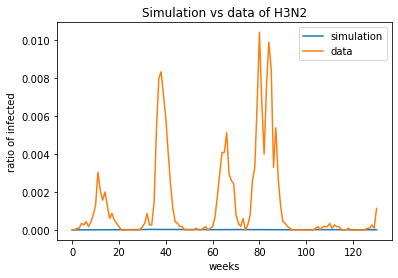

C12 is 0.875 c21 is 0.1


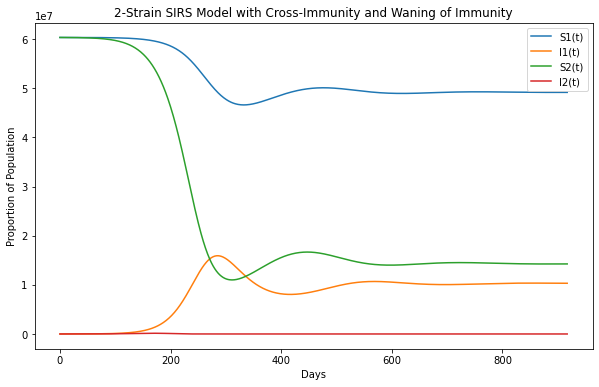

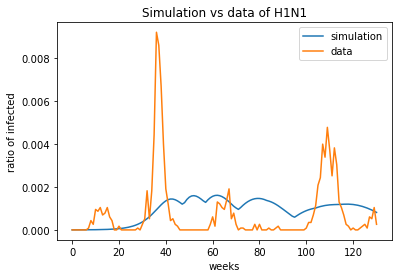

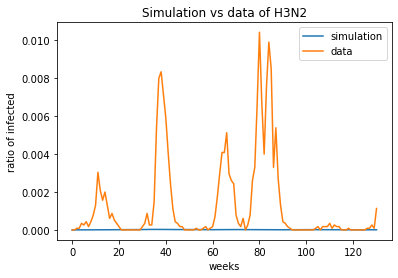

C12 is 0.875 c21 is 0.125


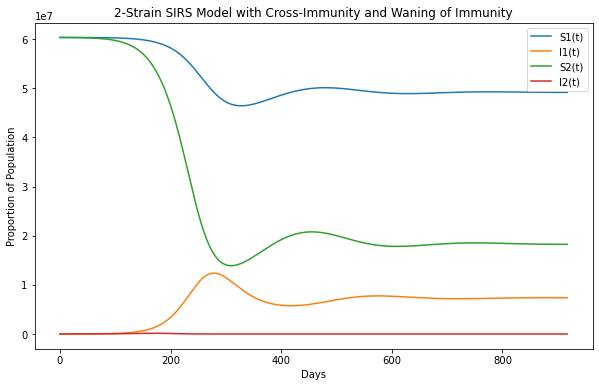

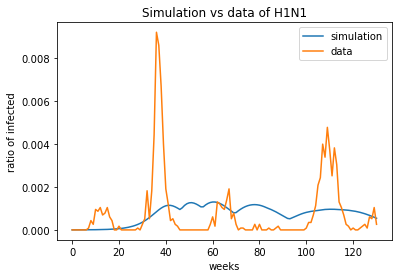

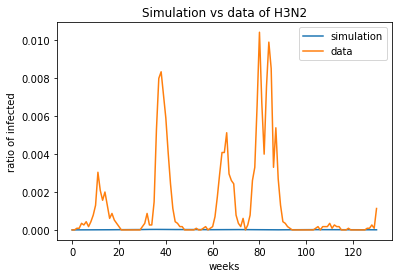

C12 is 0.875 c21 is 0.15000000000000002


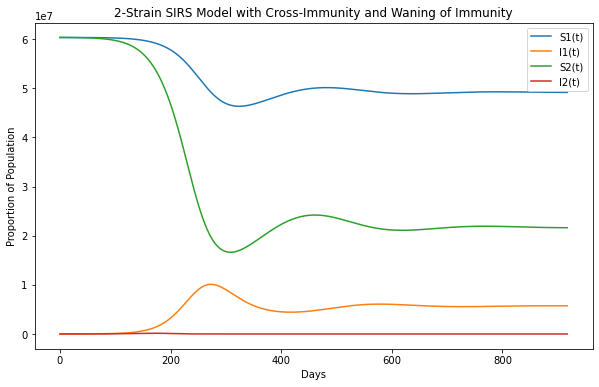

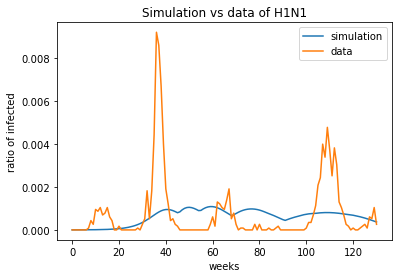

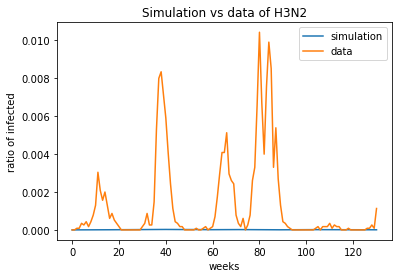

C12 is 0.875 c21 is 0.17500000000000002


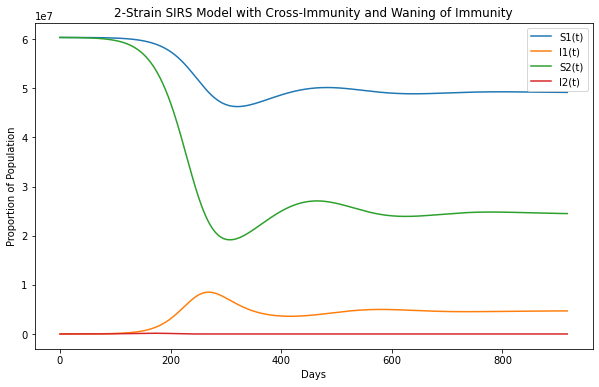

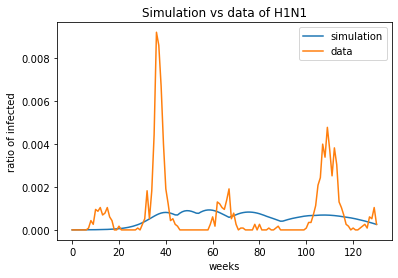

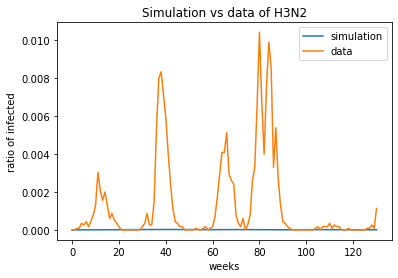

C12 is 0.875 c21 is 0.2


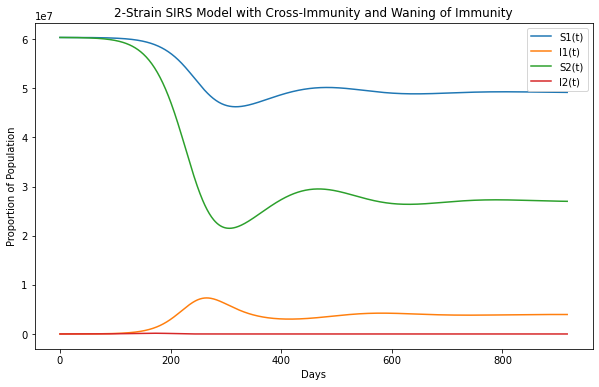

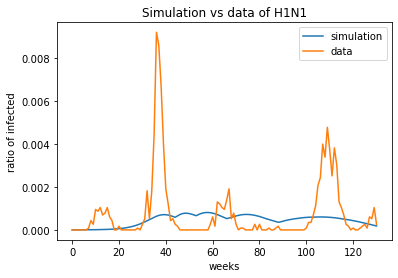

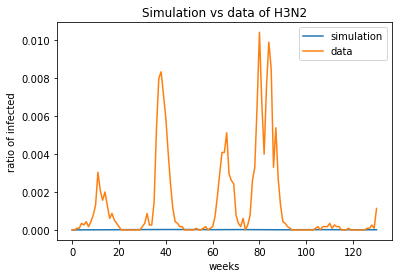

C12 is 0.9125 c21 is 0.1


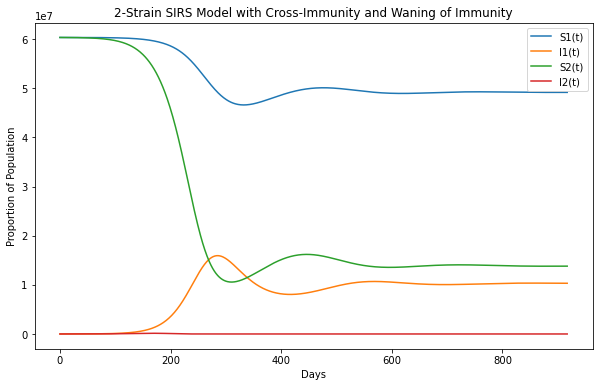

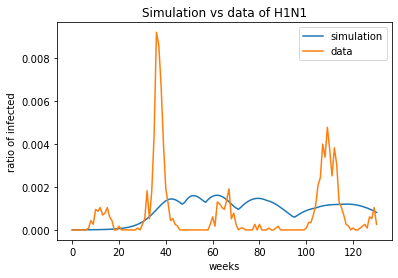

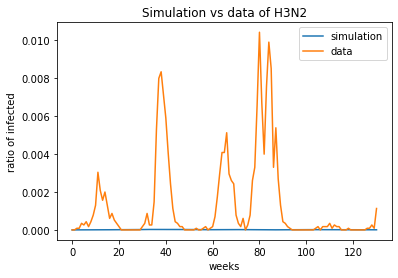

C12 is 0.9125 c21 is 0.125


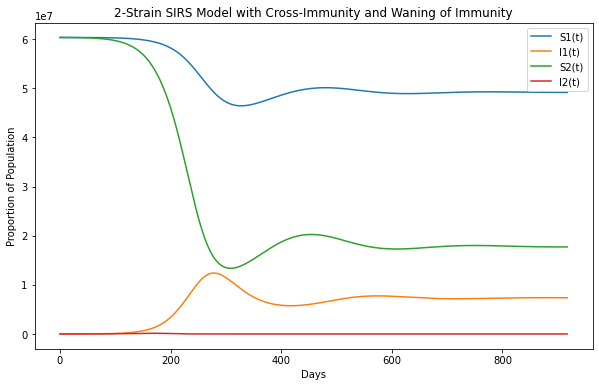

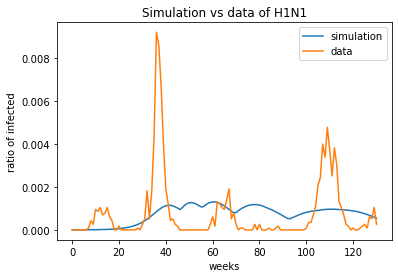

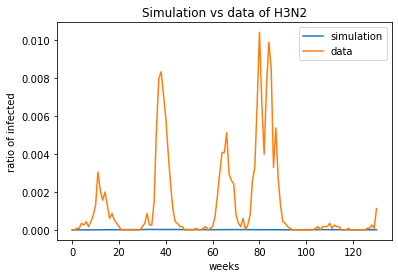

C12 is 0.9125 c21 is 0.15000000000000002


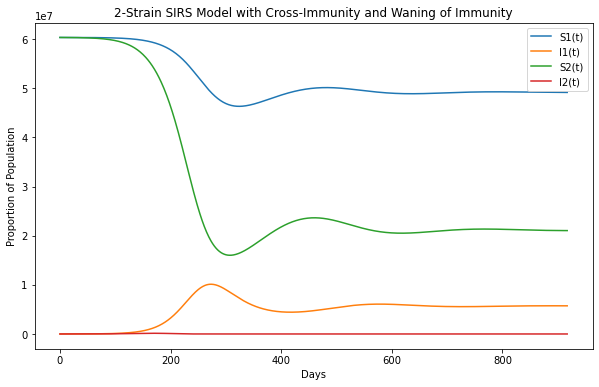

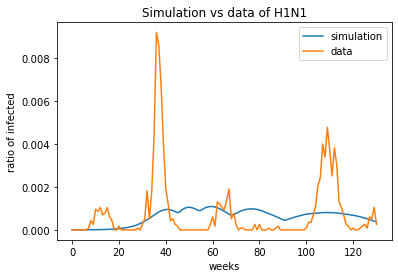

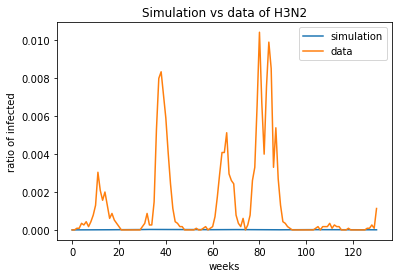

C12 is 0.9125 c21 is 0.17500000000000002


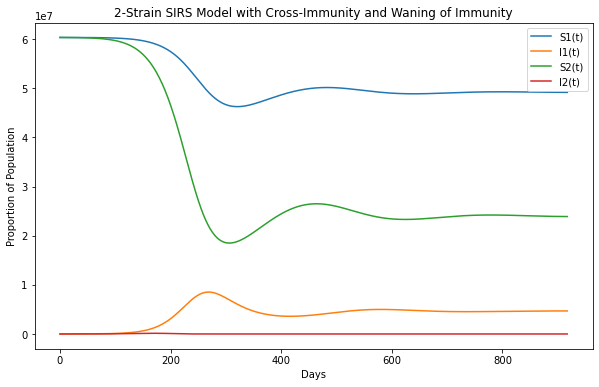

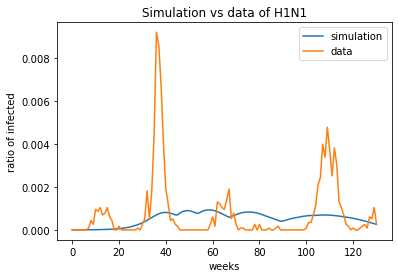

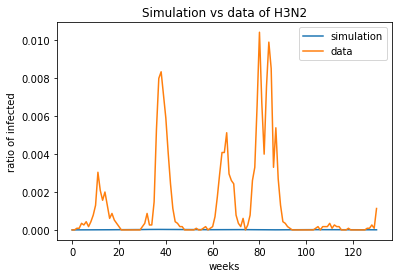

C12 is 0.9125 c21 is 0.2


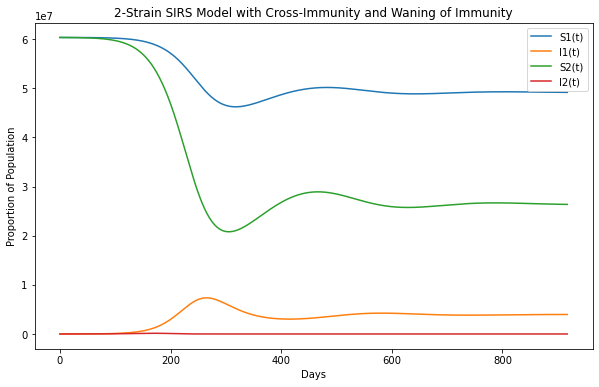

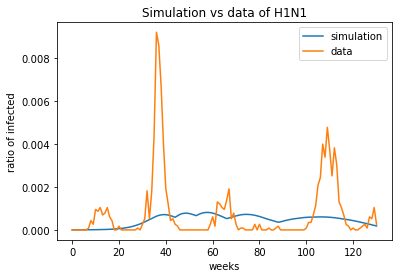

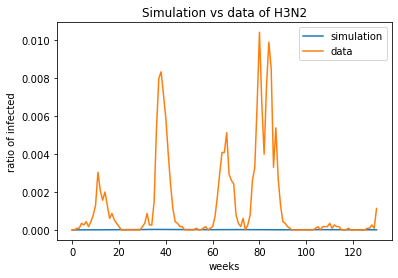

C12 is 0.95 c21 is 0.1


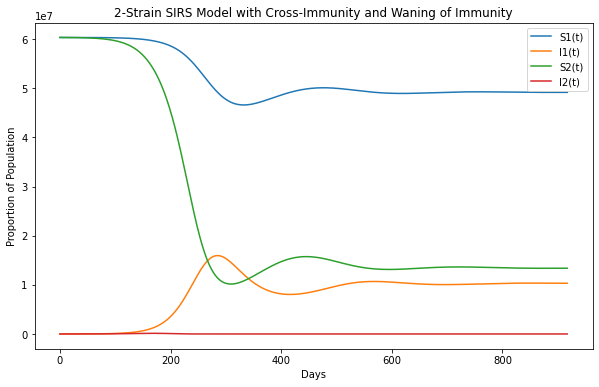

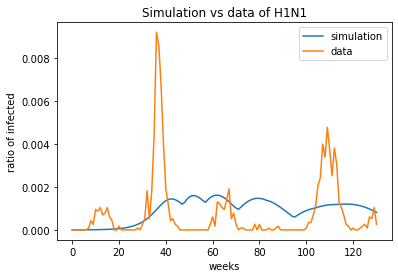

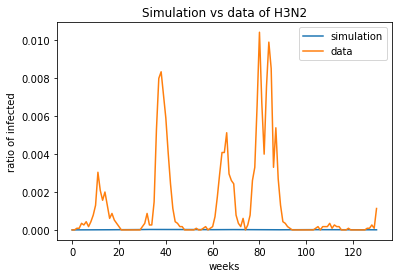

C12 is 0.95 c21 is 0.125


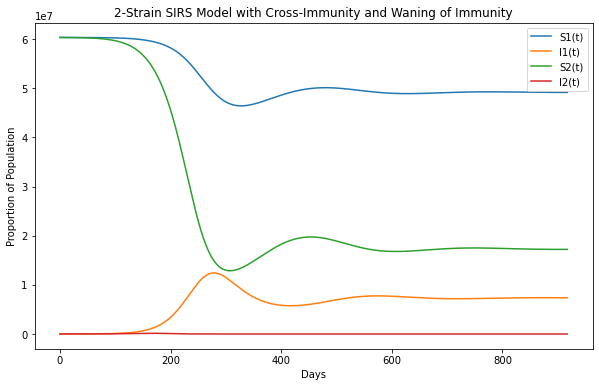

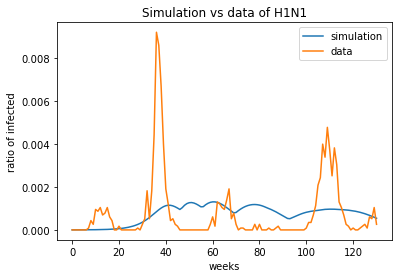

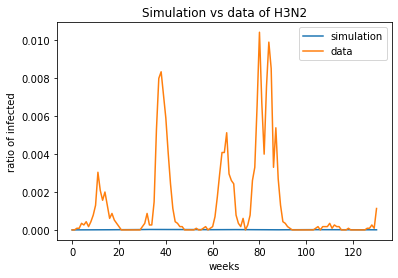

C12 is 0.95 c21 is 0.15000000000000002


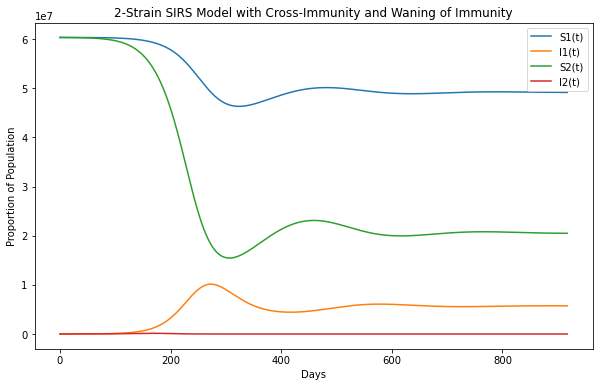

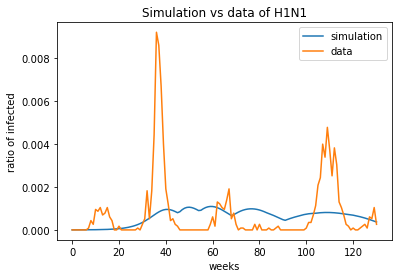

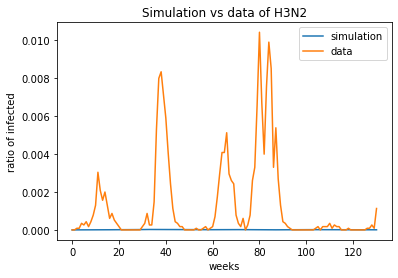

C12 is 0.95 c21 is 0.17500000000000002


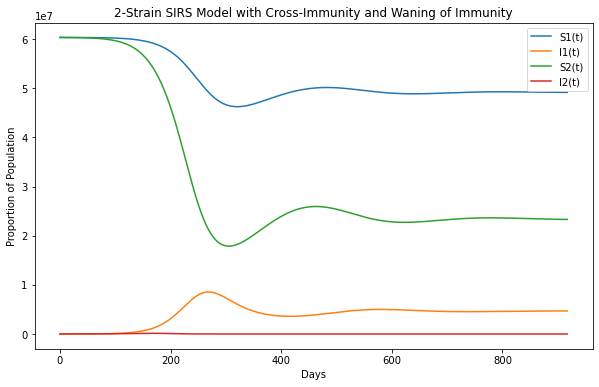

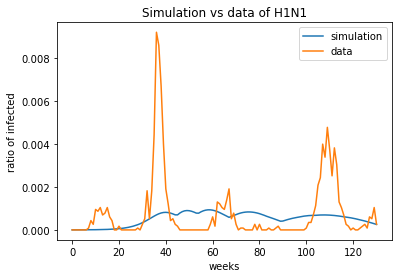

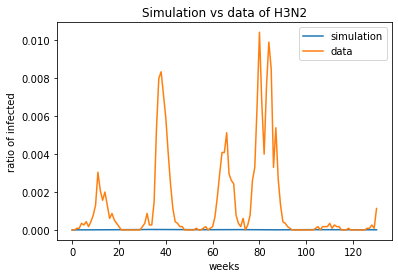

C12 is 0.95 c21 is 0.2


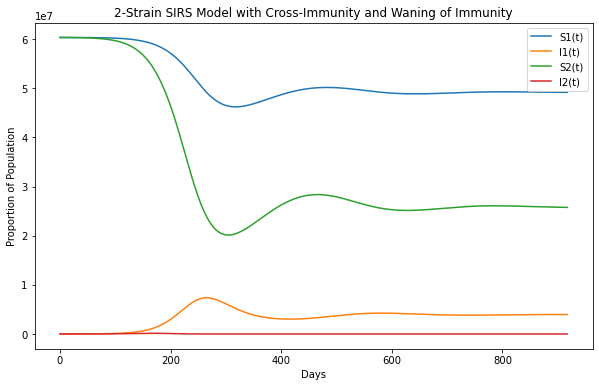

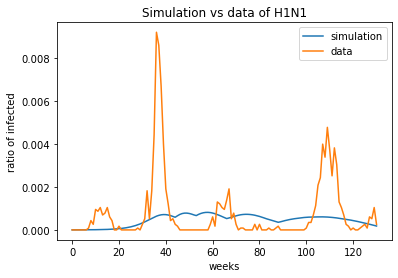

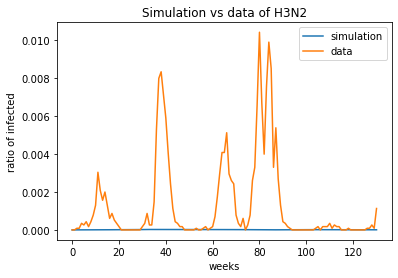

In [258]:
trials = []
for c12 in c12s:
    for c21 in c21s: 
        trial = odeint(SIRS, y0, t, args=(N, beta_1, beta_2, gamma1, gamma2, mu, c12, c21, L1,L2))
        S_1, I_1, R_1, S_2, I_2, R_2 = trial.T
        print("C12 is",c12,"c21 is",c21)
        plot_model(trial.T)
        inc1,inc2 = incidence(trial.T[1],trial.T[4])
        compare(inc1,inc2)


In [259]:
# C12 is 0.8375 c21 is 0.1
# C12 is 0.875 c21 is 0.125   best fits
c12 = (0.8375+0.875)/2
c21 = (0.1 + 0.125)/2


Beta 1  is 0.2 beta2 is 0.3


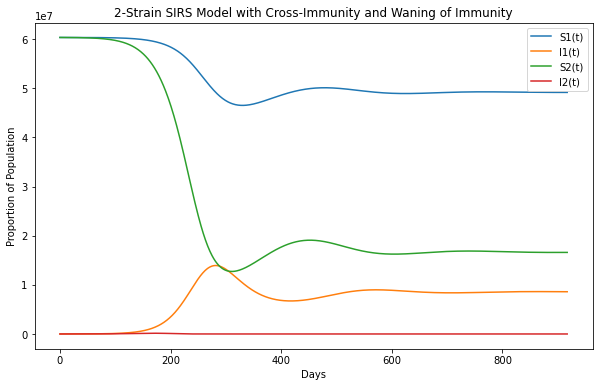

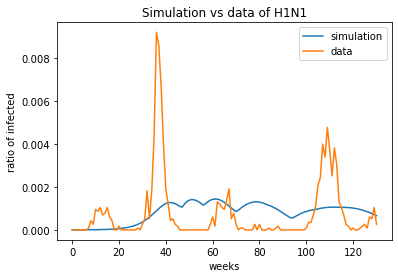

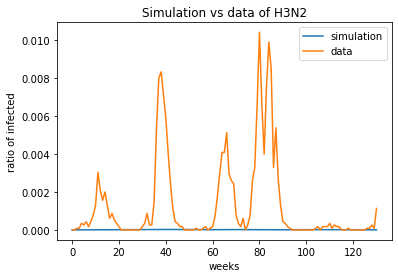

Beta 1  is 0.2 beta2 is 0.425


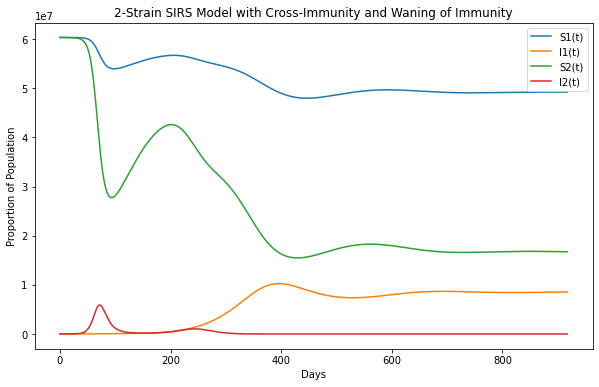

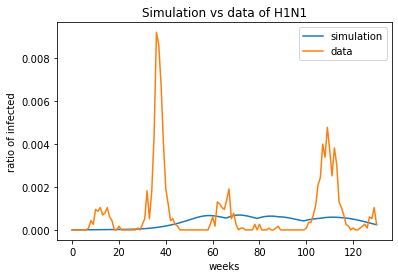

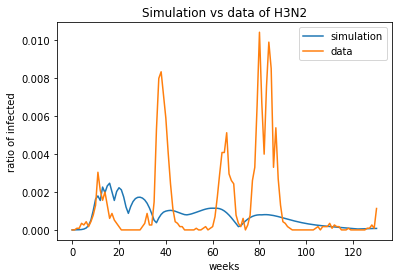

Beta 1  is 0.2 beta2 is 0.55


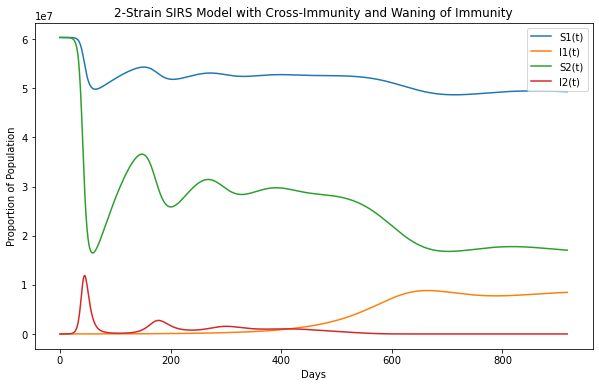

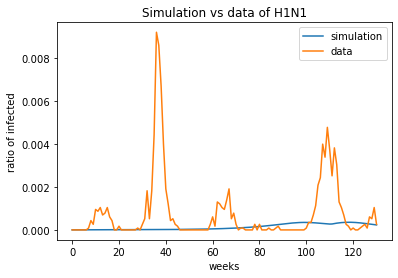

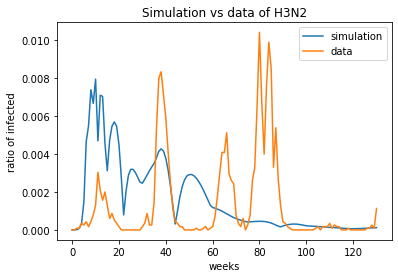

Beta 1  is 0.2 beta2 is 0.675


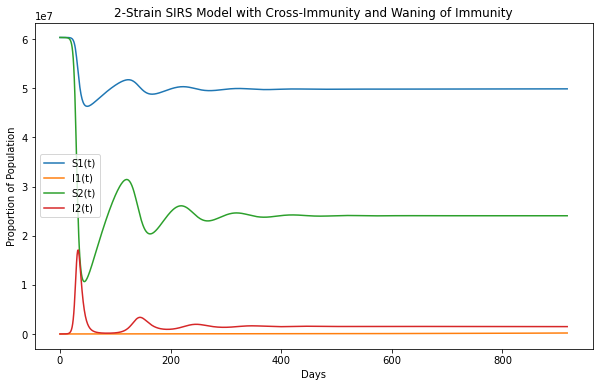

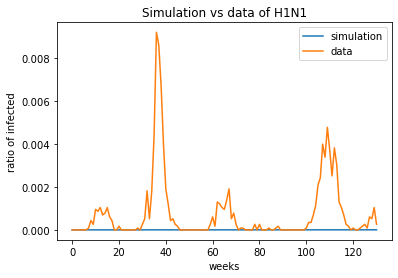

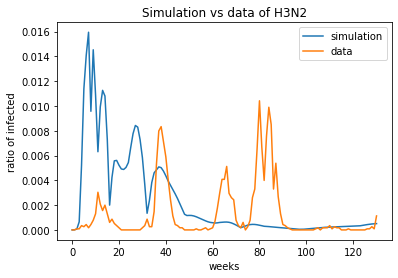

Beta 1  is 0.2 beta2 is 0.8


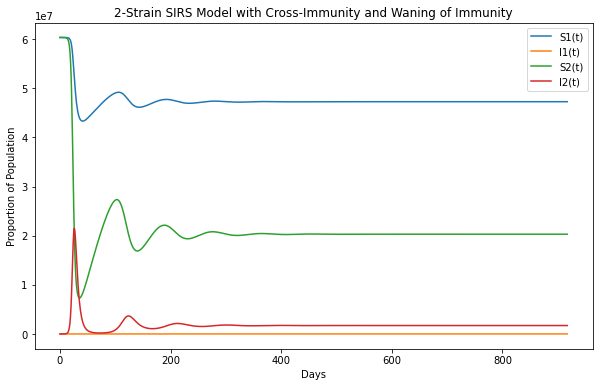

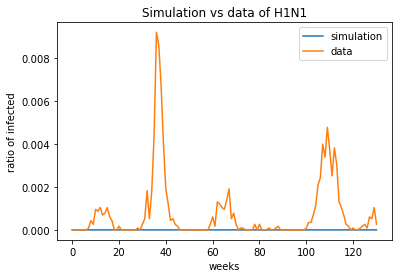

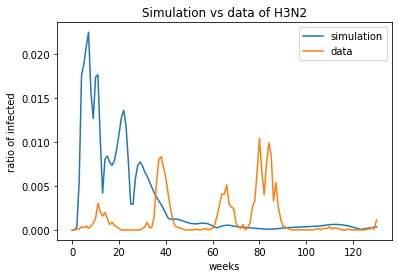

Beta 1  is 0.2375 beta2 is 0.3


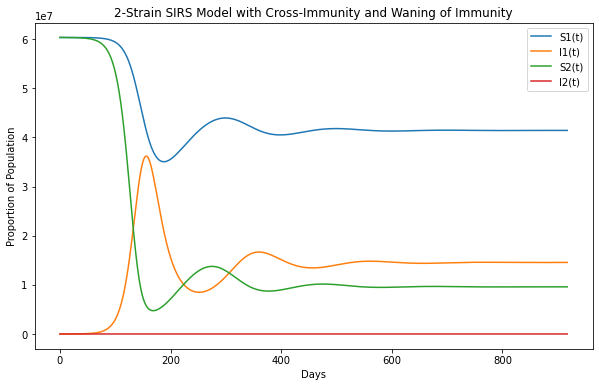

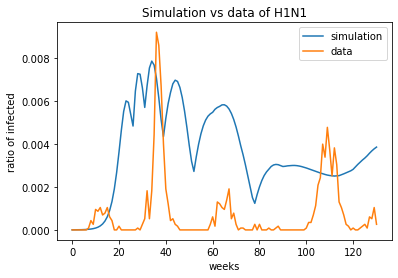

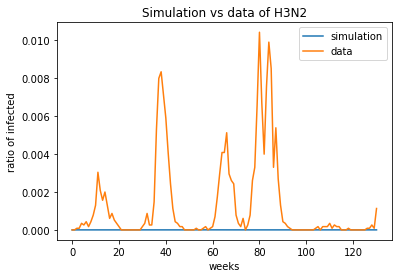

Beta 1  is 0.2375 beta2 is 0.425


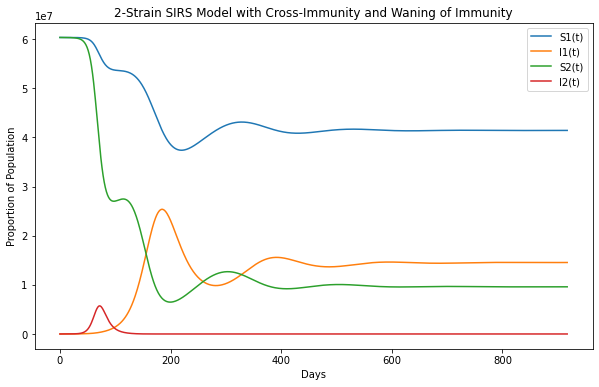

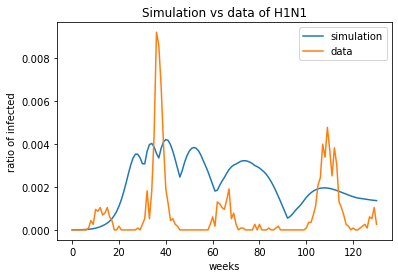

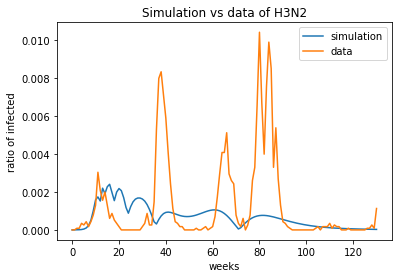

Beta 1  is 0.2375 beta2 is 0.55


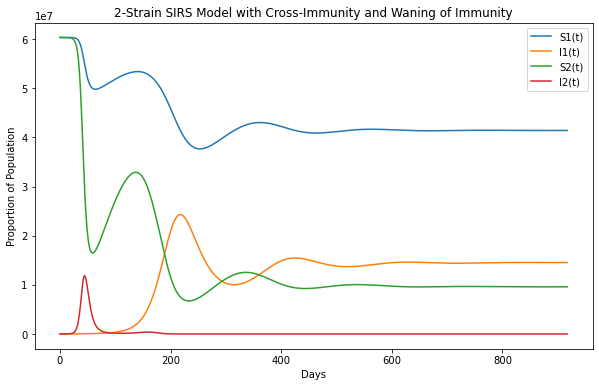

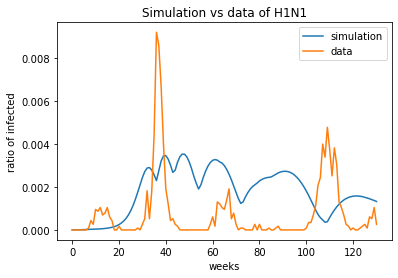

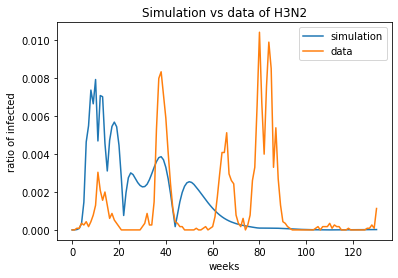

Beta 1  is 0.2375 beta2 is 0.675


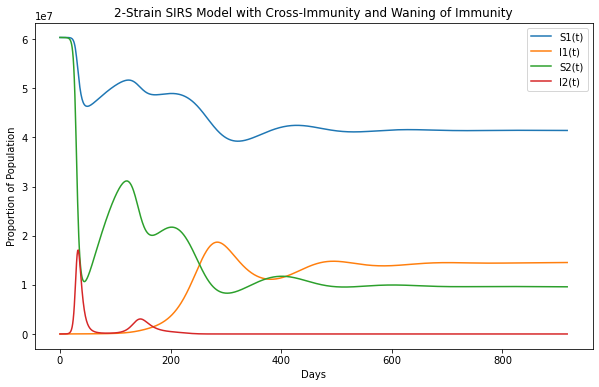

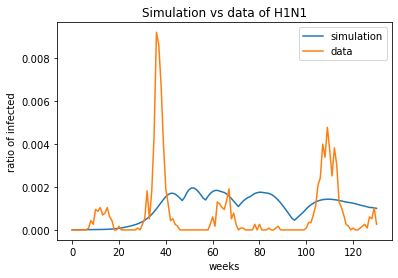

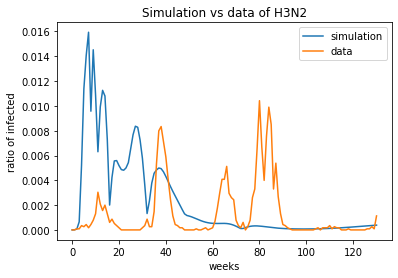

Beta 1  is 0.2375 beta2 is 0.8


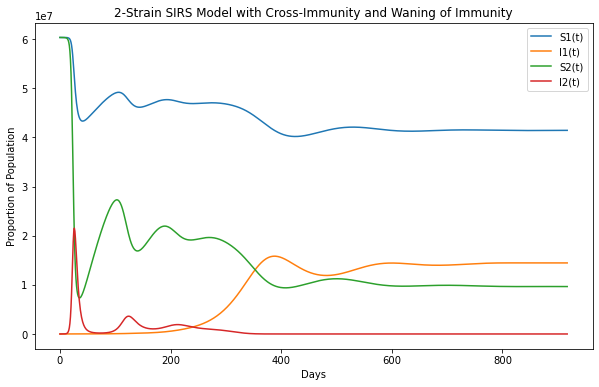

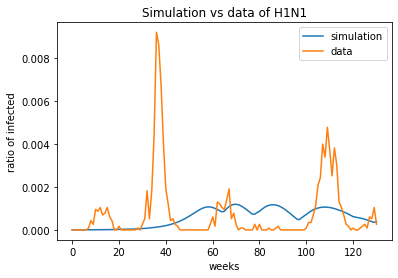

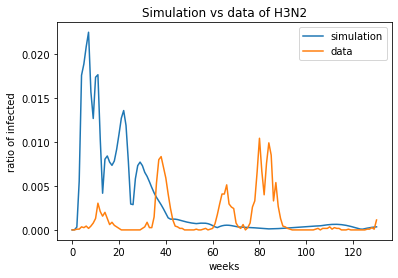

Beta 1  is 0.275 beta2 is 0.3


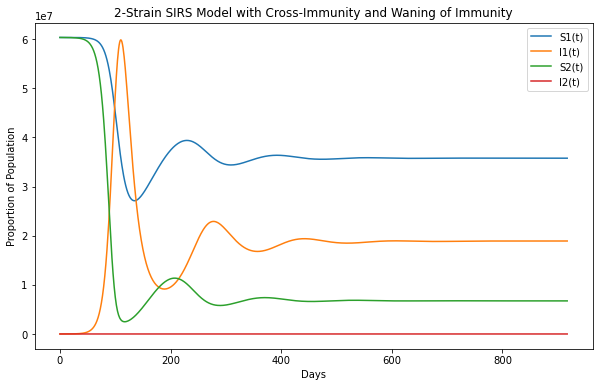

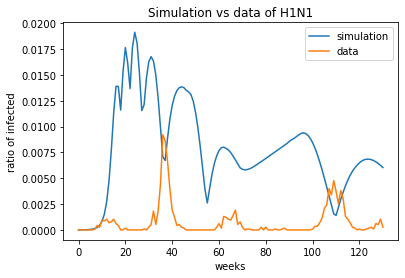

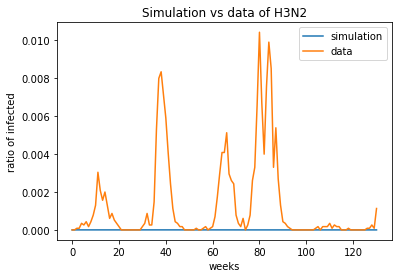

Beta 1  is 0.275 beta2 is 0.425


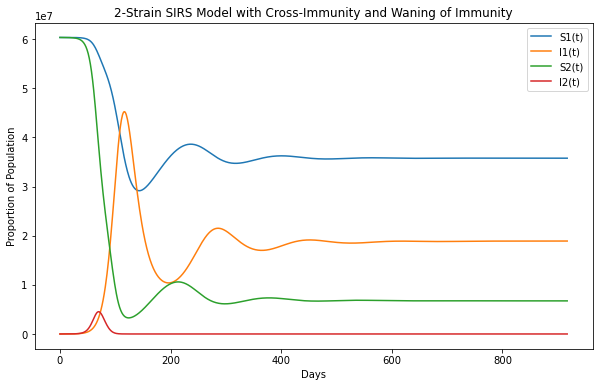

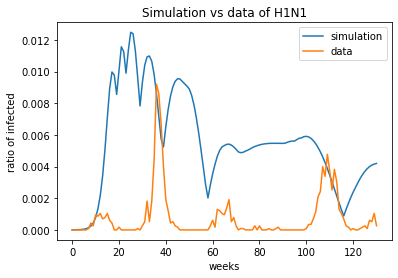

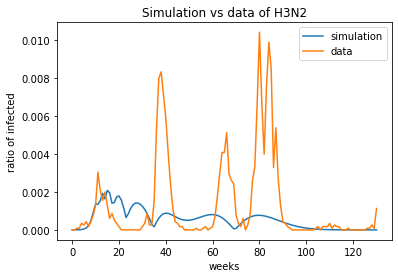

Beta 1  is 0.275 beta2 is 0.55


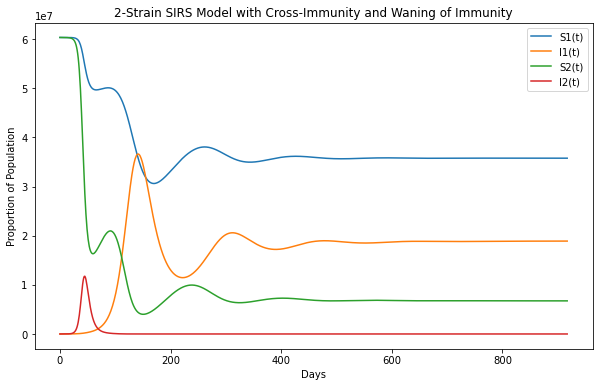

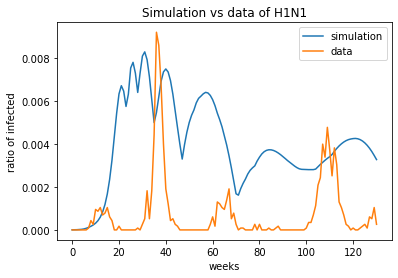

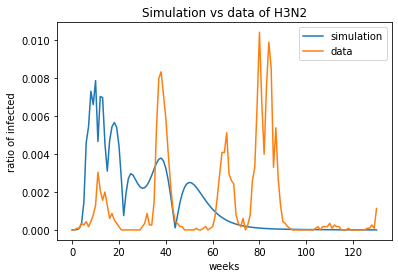

Beta 1  is 0.275 beta2 is 0.675


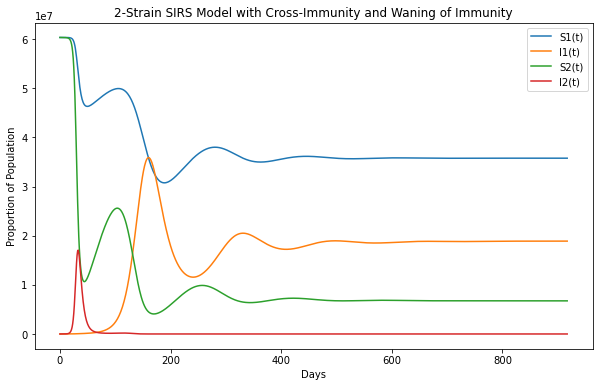

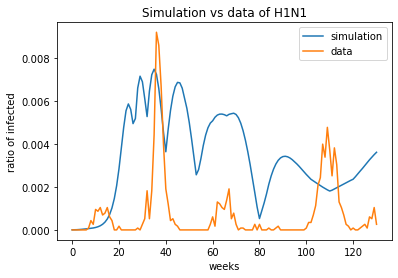

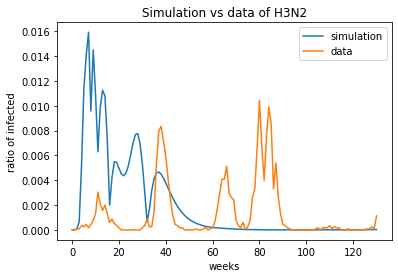

Beta 1  is 0.275 beta2 is 0.8


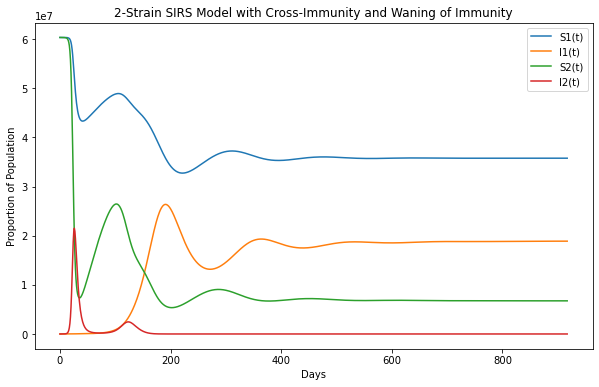

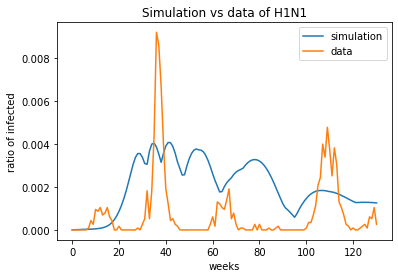

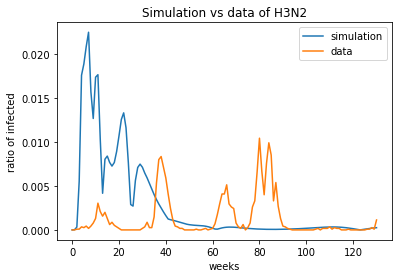

Beta 1  is 0.3125 beta2 is 0.3


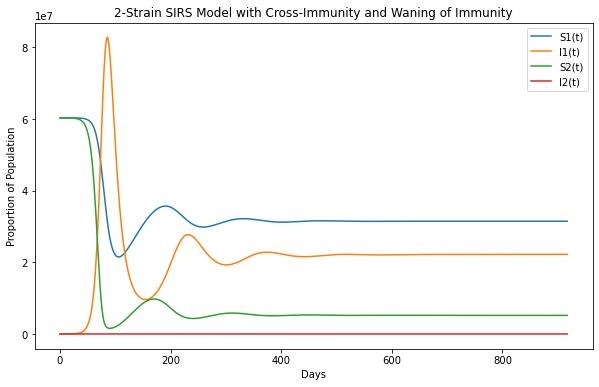

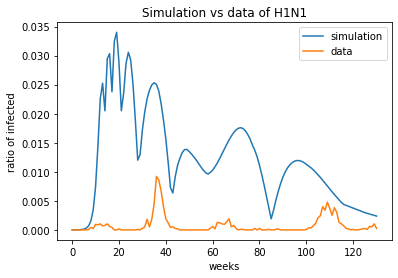

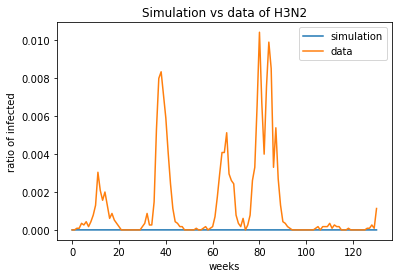

Beta 1  is 0.3125 beta2 is 0.425


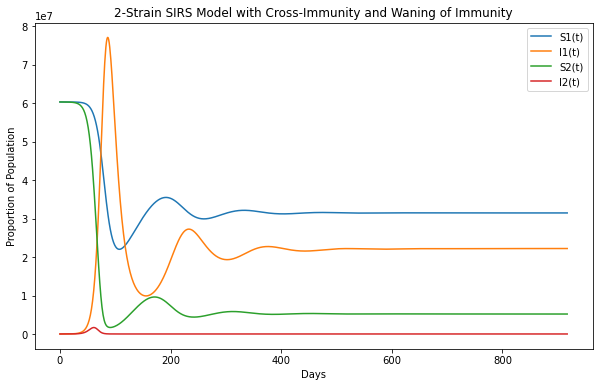

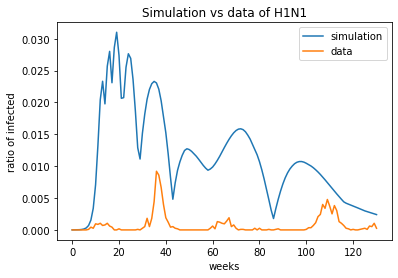

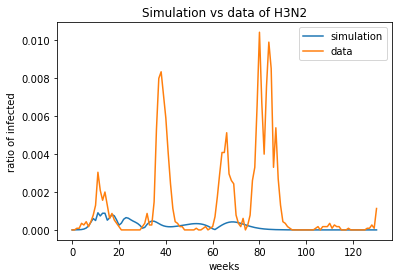

Beta 1  is 0.3125 beta2 is 0.55


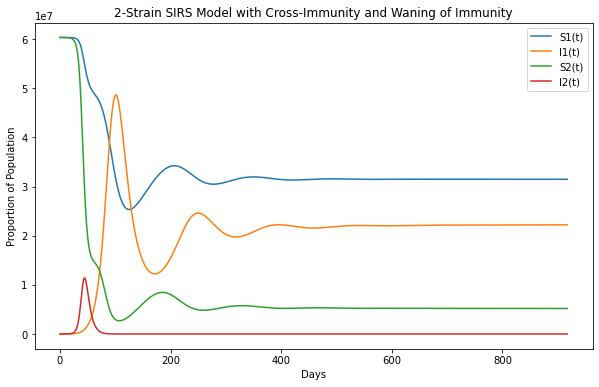

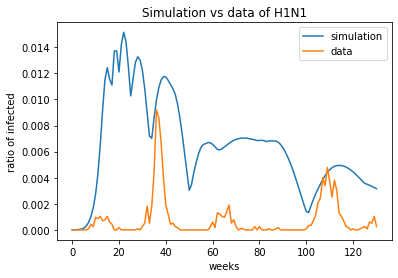

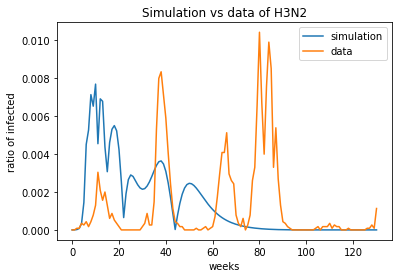

Beta 1  is 0.3125 beta2 is 0.675


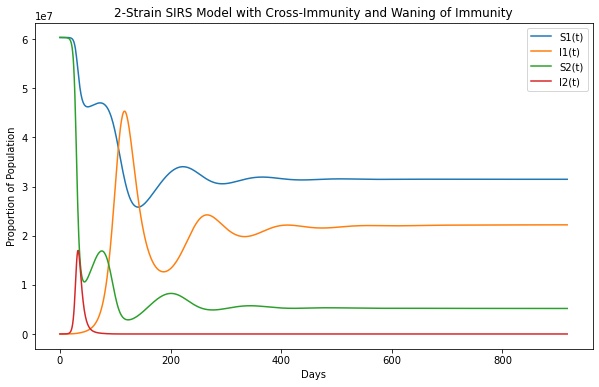

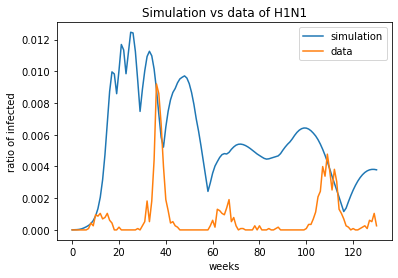

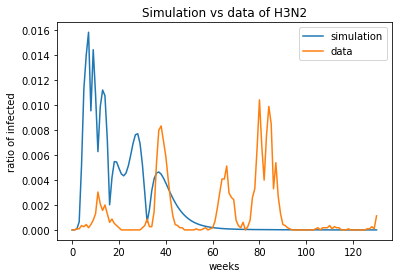

Beta 1  is 0.3125 beta2 is 0.8


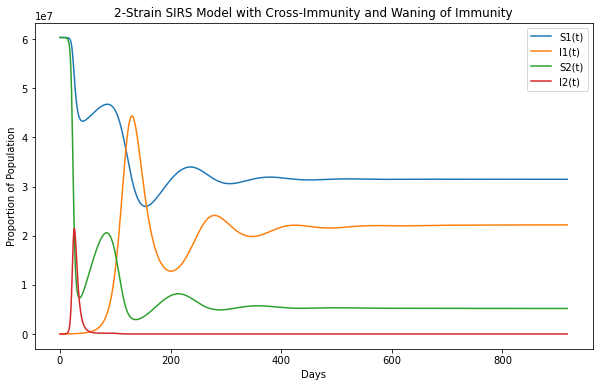

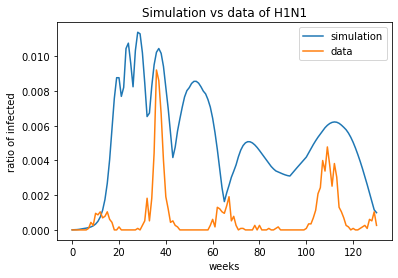

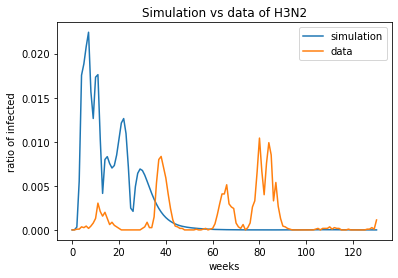

Beta 1  is 0.35 beta2 is 0.3


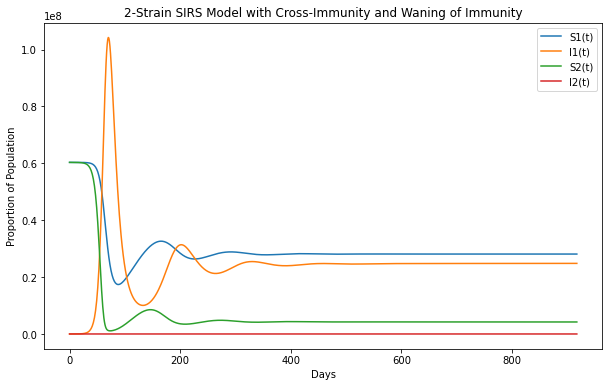

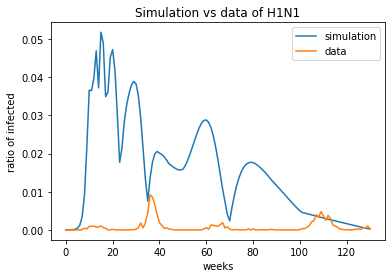

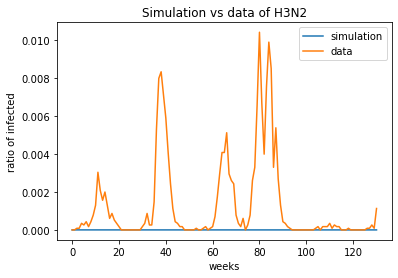

Beta 1  is 0.35 beta2 is 0.425


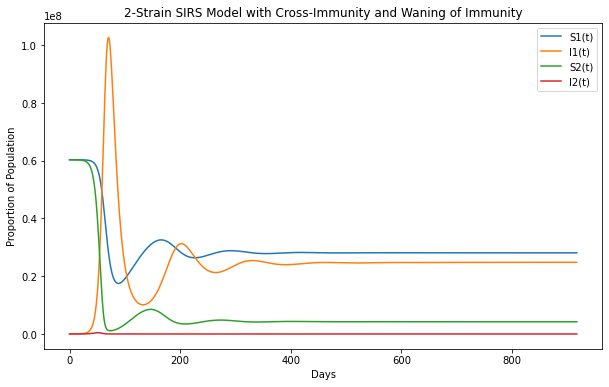

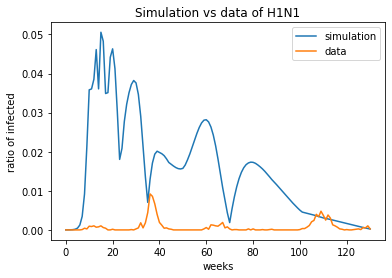

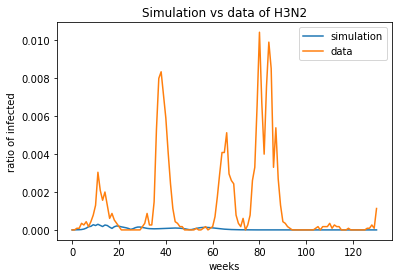

Beta 1  is 0.35 beta2 is 0.55


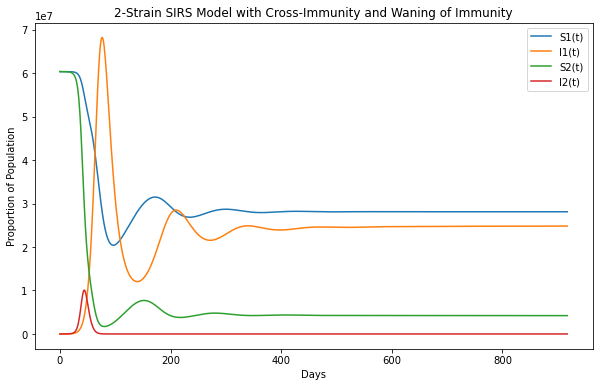

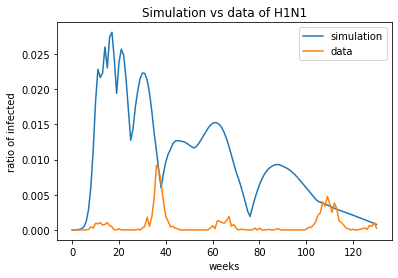

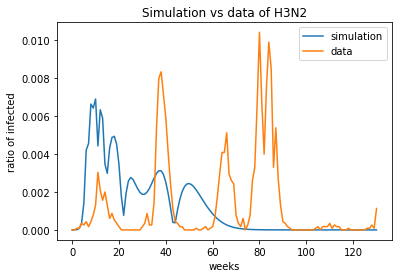

Beta 1  is 0.35 beta2 is 0.675


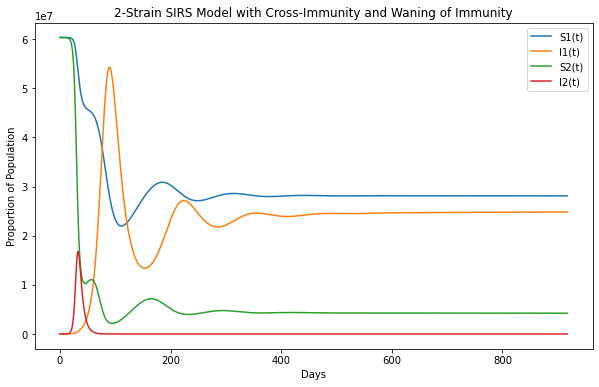

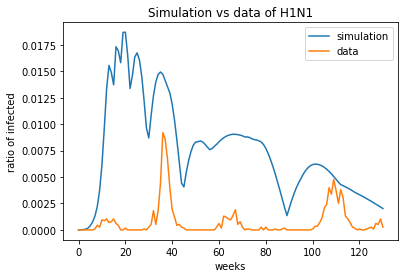

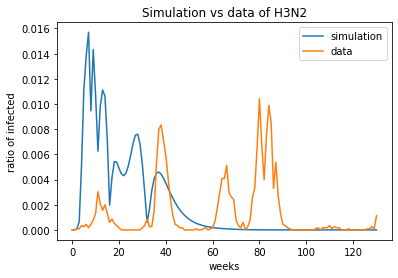

Beta 1  is 0.35 beta2 is 0.8


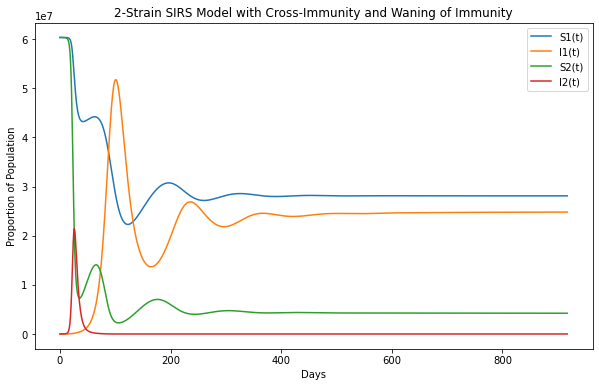

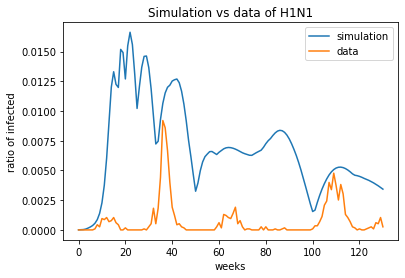

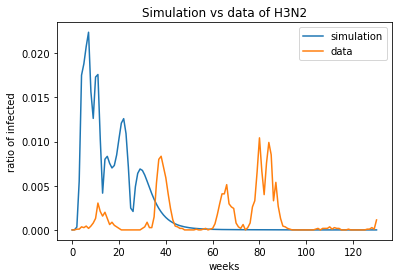

In [260]:
trials = []
for beta1 in beta1s:
    for beta2 in beta2s: 
        trial = odeint(SIRS, y0, t, args=(N, beta1, beta2, gamma1, gamma2, mu, c12, c21, L1,L2))
        S_1, I_1, R_1, S_2, I_2, R_2 = trial.T
        print("Beta 1  is", beta1,"beta2 is",beta2)
        plot_model(trial.T)
        inc1,inc2 = incidence(trial.T[1],trial.T[4])
        compare(inc1,inc2)

In [261]:
beta1 = 0.300
beta2 = 0.435

Gamma 1 is 0.15 gamma2 is 0.1


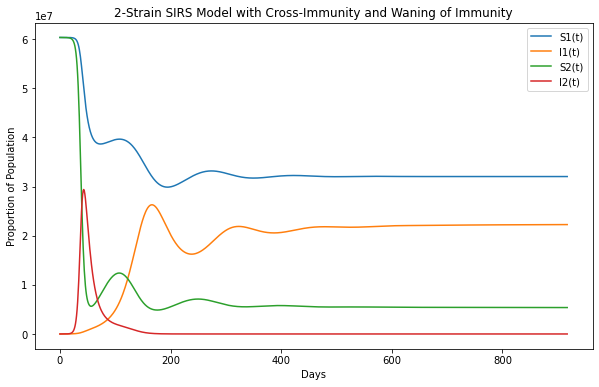

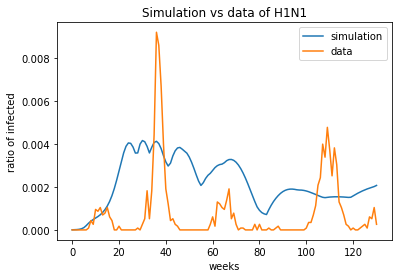

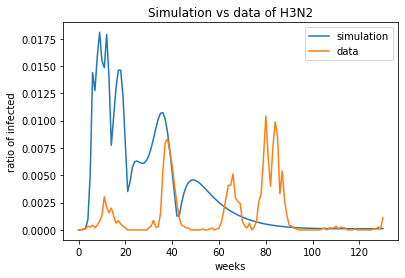

Gamma 1 is 0.15 gamma2 is 0.14


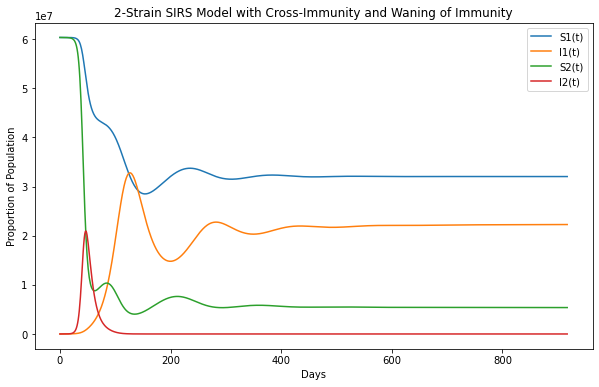

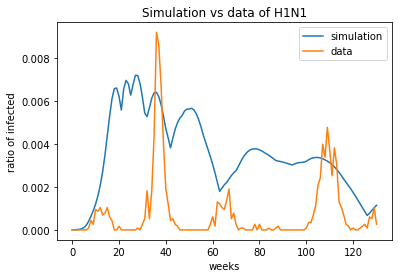

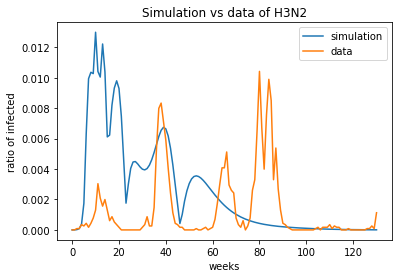

Gamma 1 is 0.15 gamma2 is 0.18


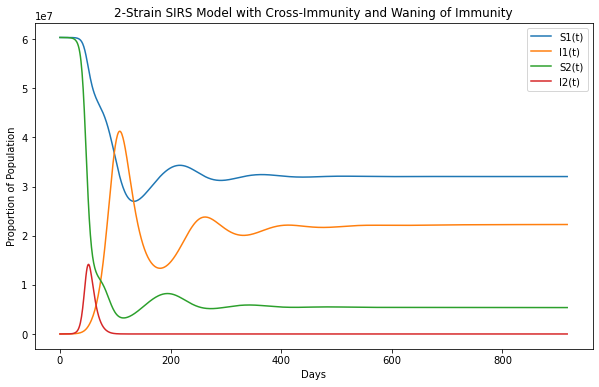

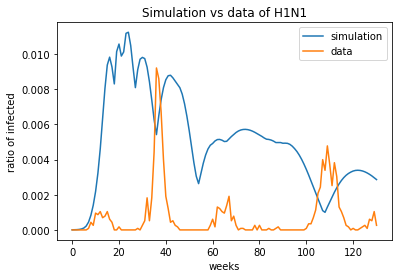

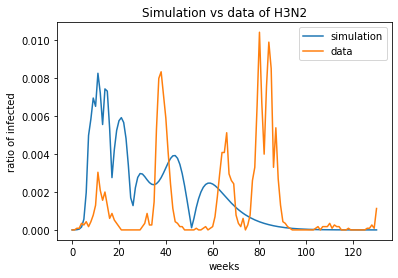

Gamma 1 is 0.15 gamma2 is 0.22


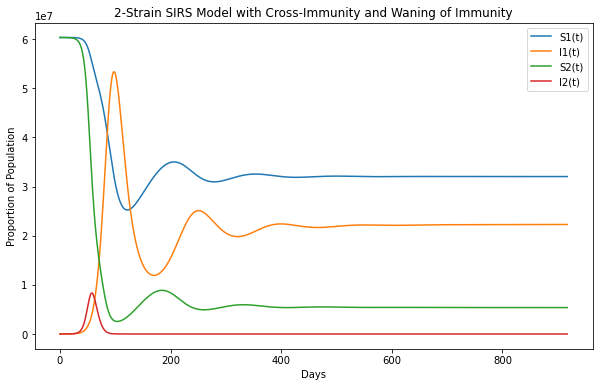

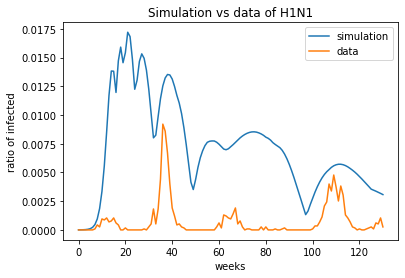

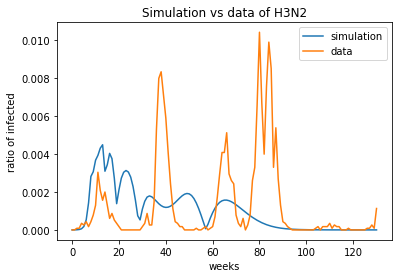

Gamma 1 is 0.15 gamma2 is 0.26


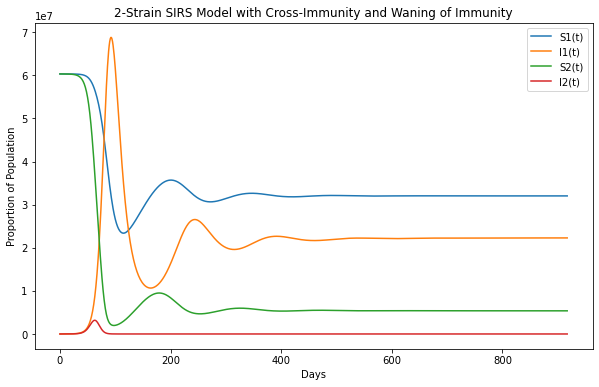

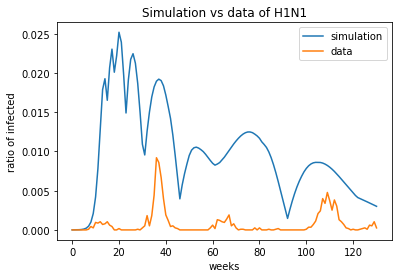

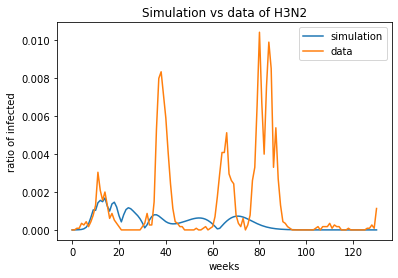

Gamma 1 is 0.1525 gamma2 is 0.1


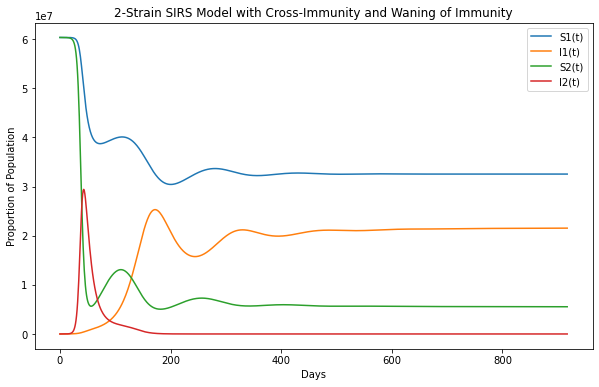

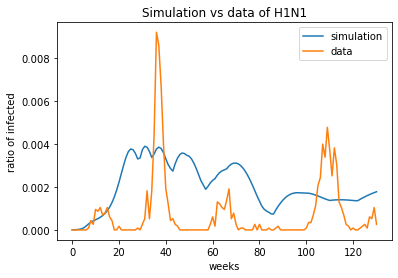

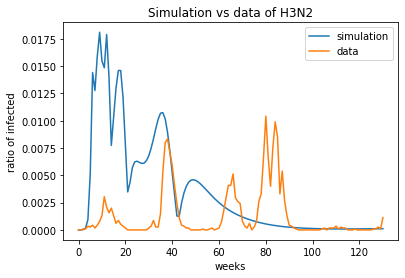

Gamma 1 is 0.1525 gamma2 is 0.14


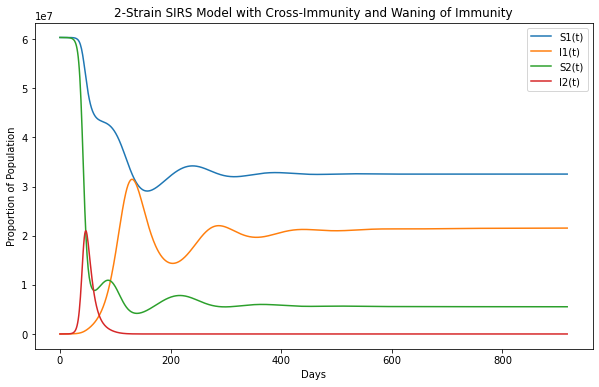

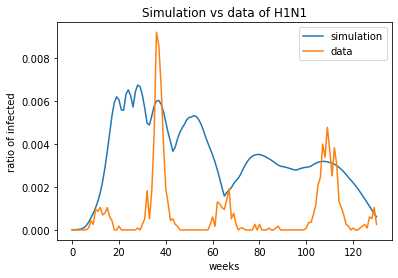

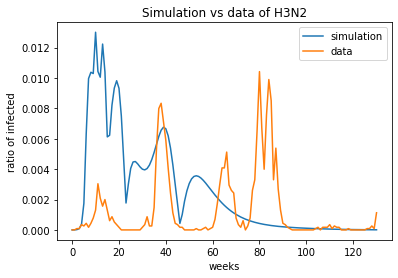

Gamma 1 is 0.1525 gamma2 is 0.18


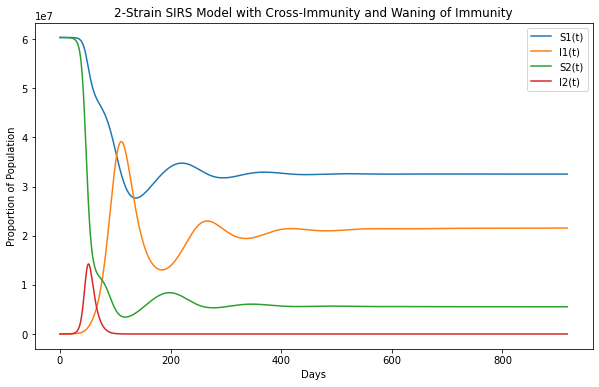

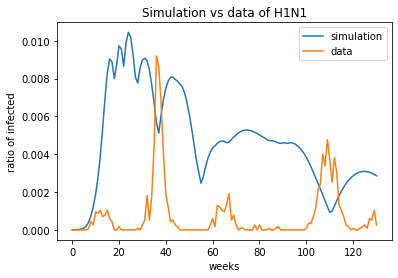

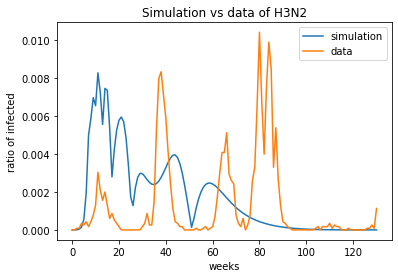

Gamma 1 is 0.1525 gamma2 is 0.22


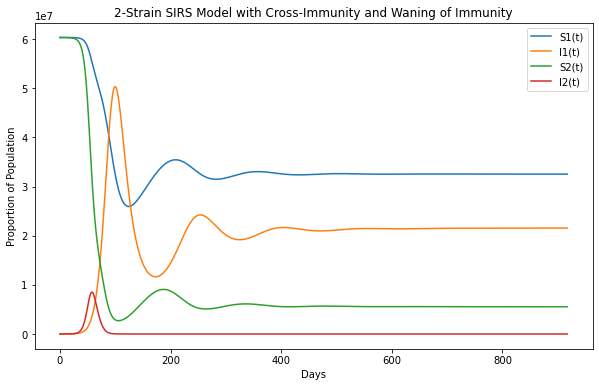

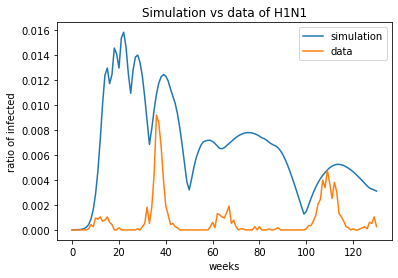

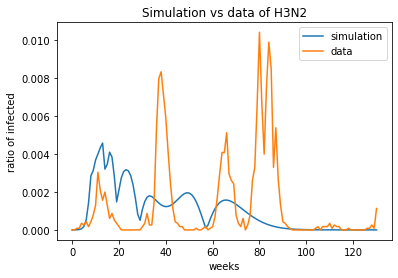

Gamma 1 is 0.1525 gamma2 is 0.26


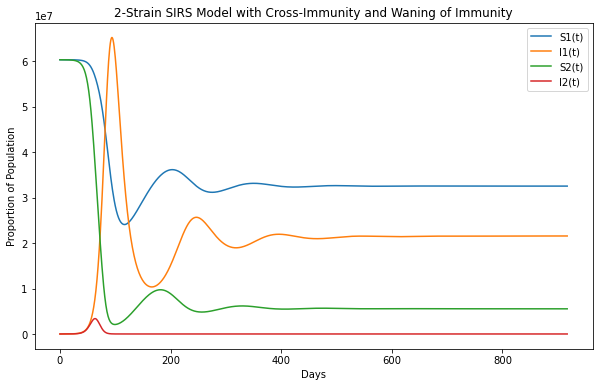

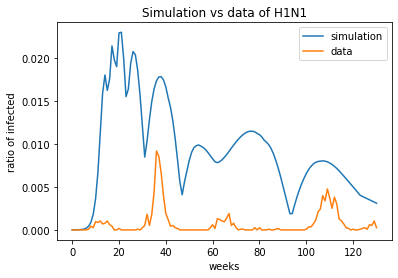

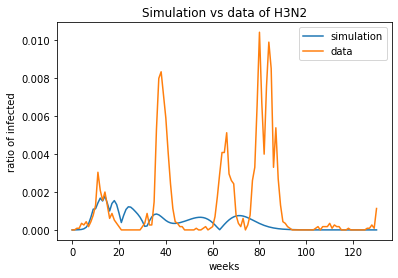

Gamma 1 is 0.155 gamma2 is 0.1


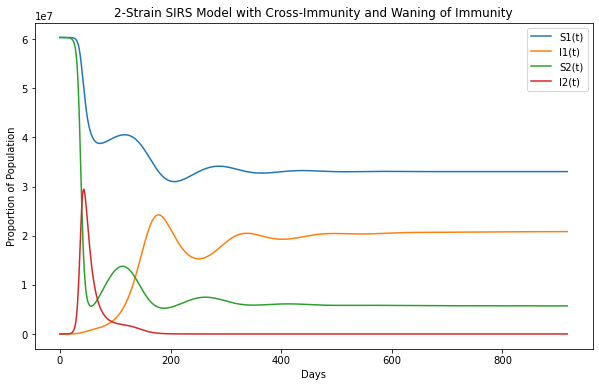

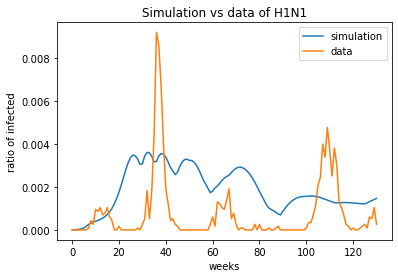

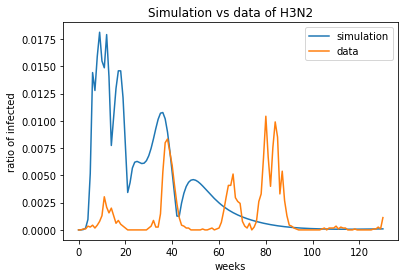

Gamma 1 is 0.155 gamma2 is 0.14


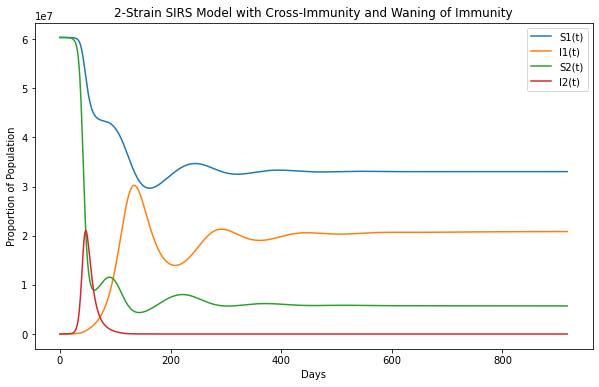

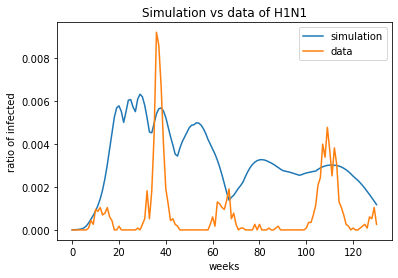

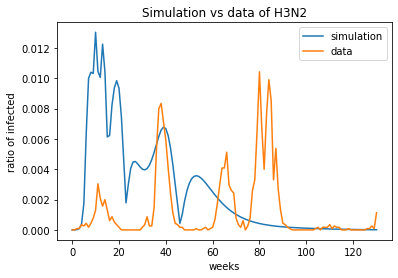

Gamma 1 is 0.155 gamma2 is 0.18


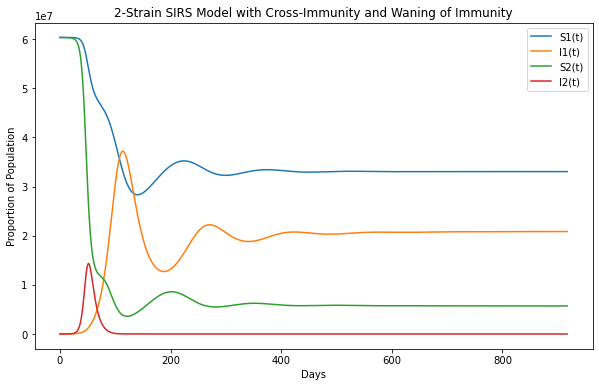

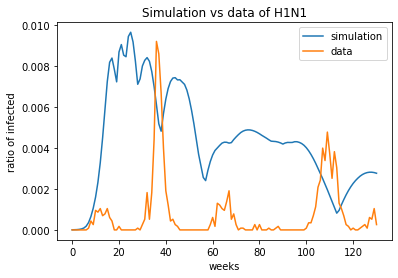

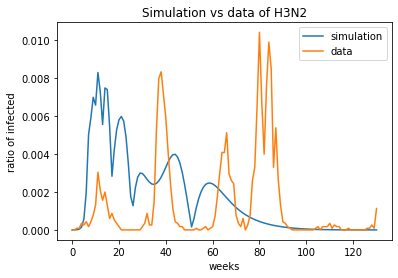

Gamma 1 is 0.155 gamma2 is 0.22


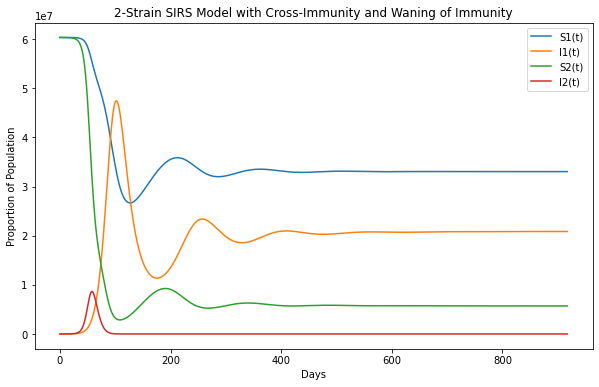

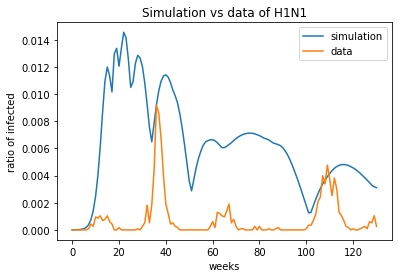

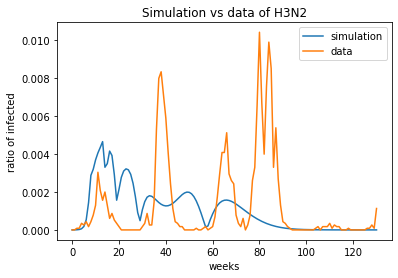

Gamma 1 is 0.155 gamma2 is 0.26


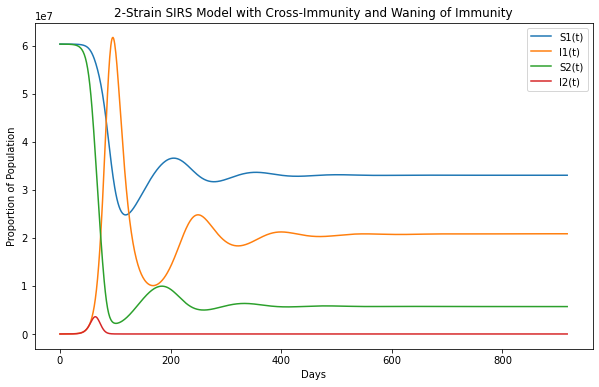

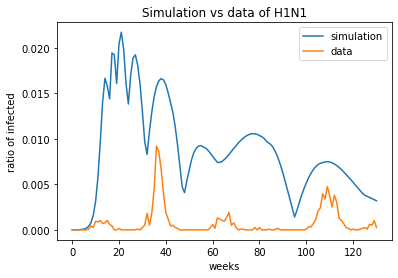

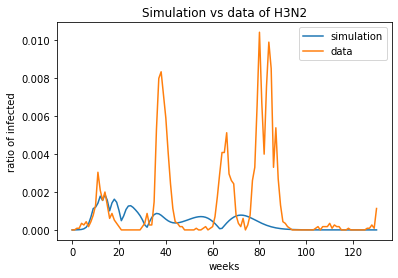

Gamma 1 is 0.1575 gamma2 is 0.1


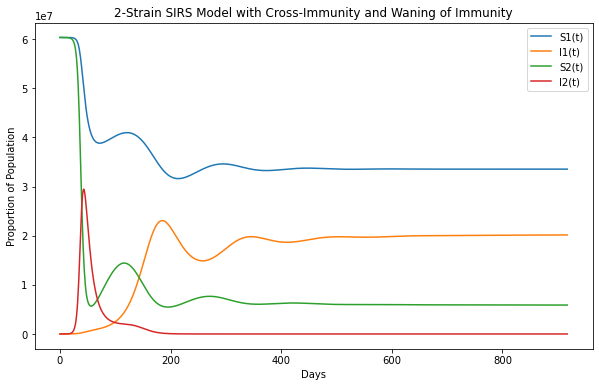

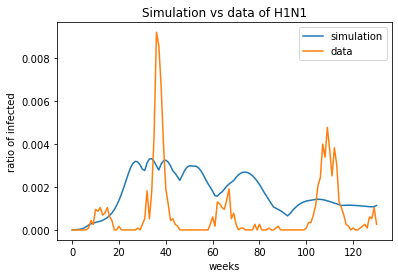

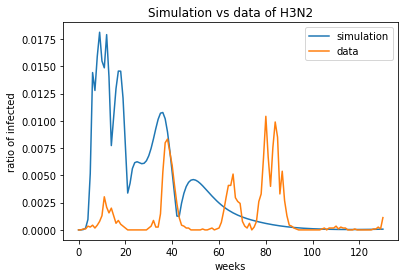

Gamma 1 is 0.1575 gamma2 is 0.14


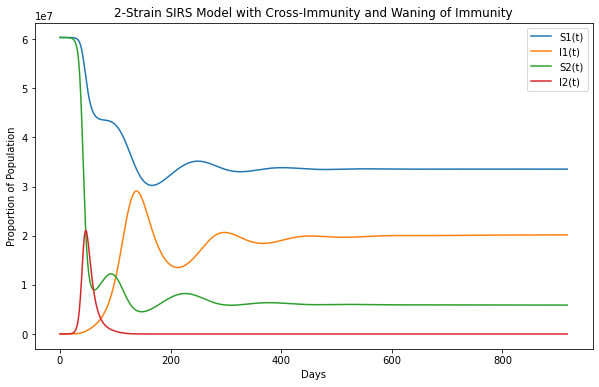

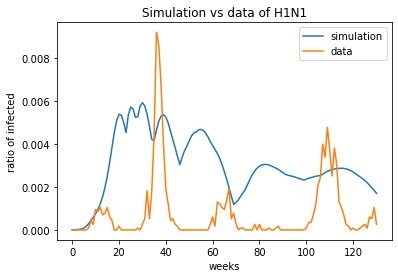

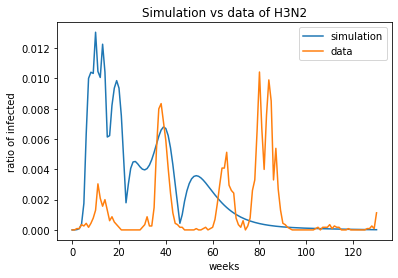

Gamma 1 is 0.1575 gamma2 is 0.18


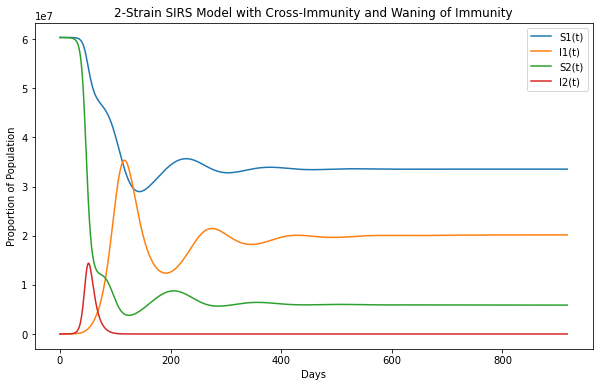

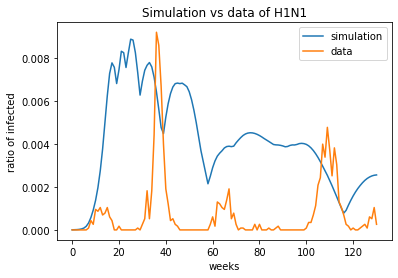

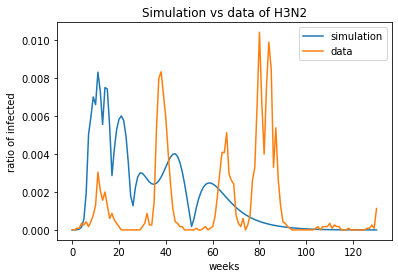

Gamma 1 is 0.1575 gamma2 is 0.22


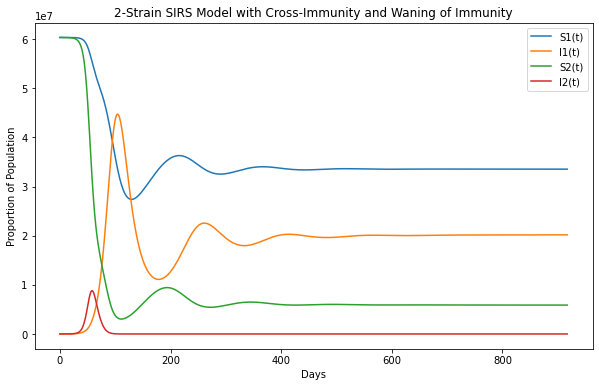

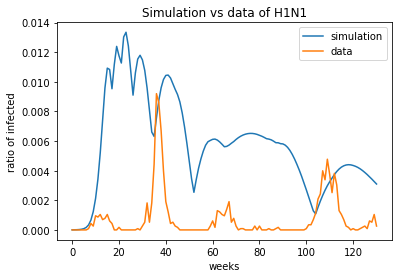

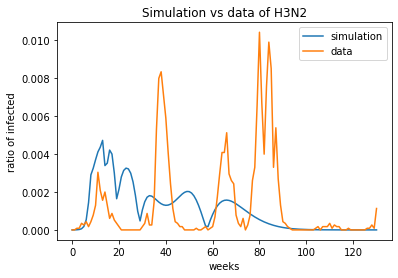

Gamma 1 is 0.1575 gamma2 is 0.26


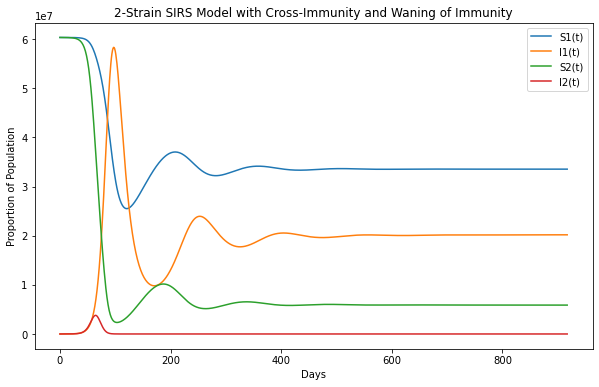

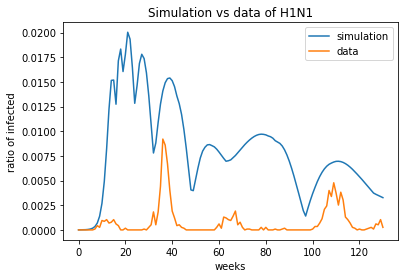

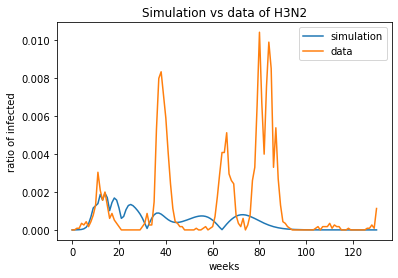

Gamma 1 is 0.16 gamma2 is 0.1


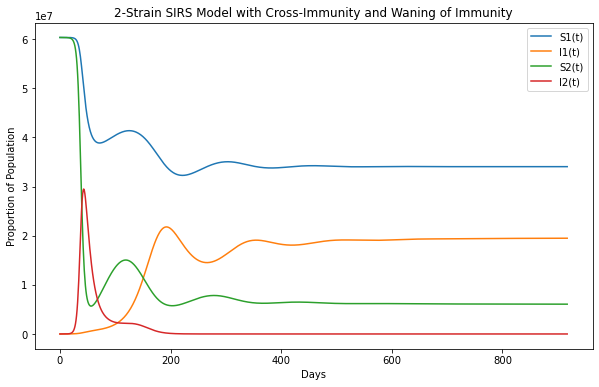

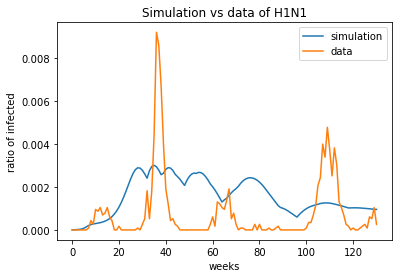

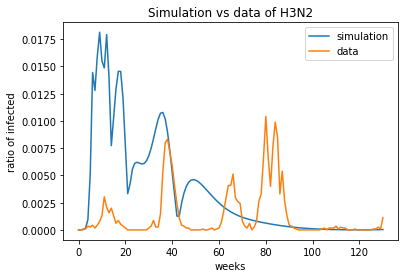

Gamma 1 is 0.16 gamma2 is 0.14


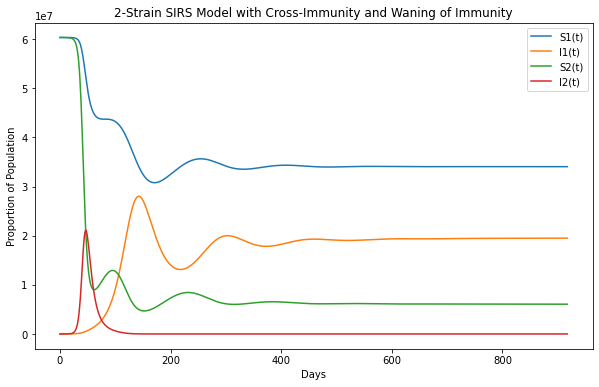

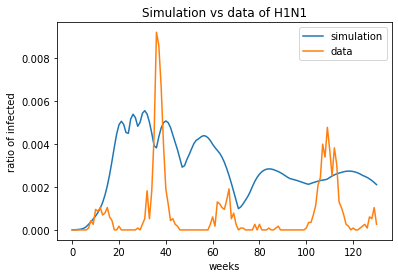

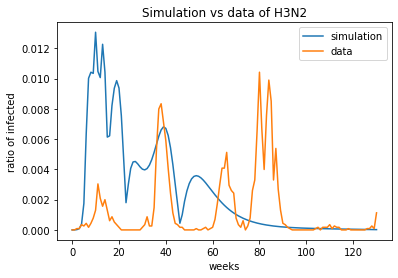

Gamma 1 is 0.16 gamma2 is 0.18


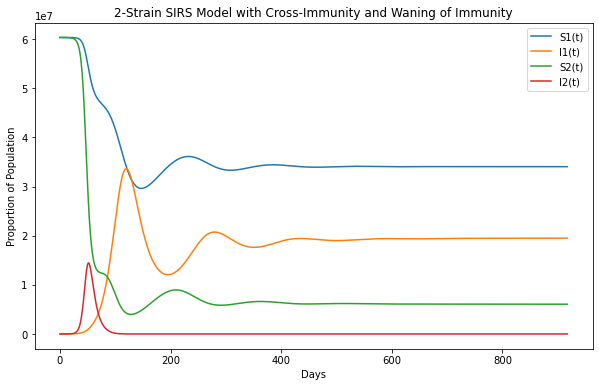

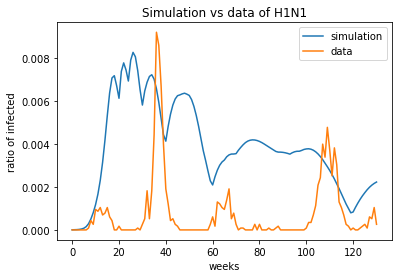

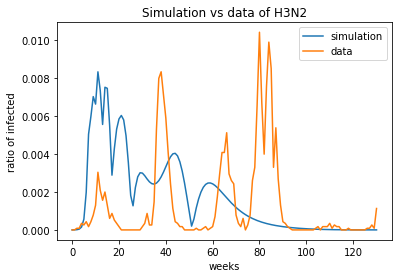

Gamma 1 is 0.16 gamma2 is 0.22


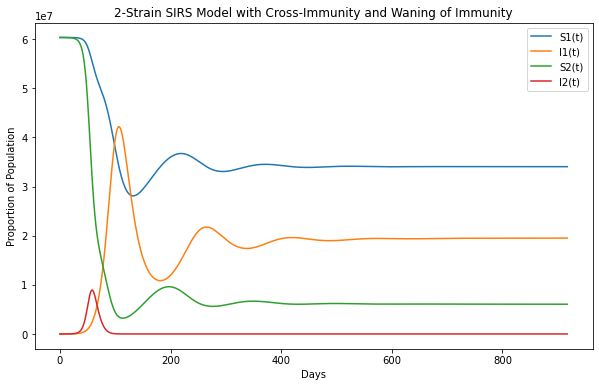

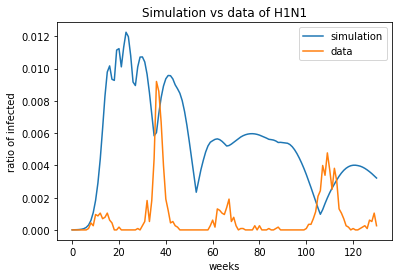

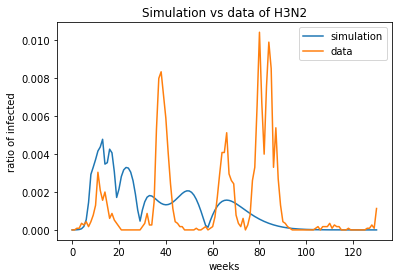

Gamma 1 is 0.16 gamma2 is 0.26


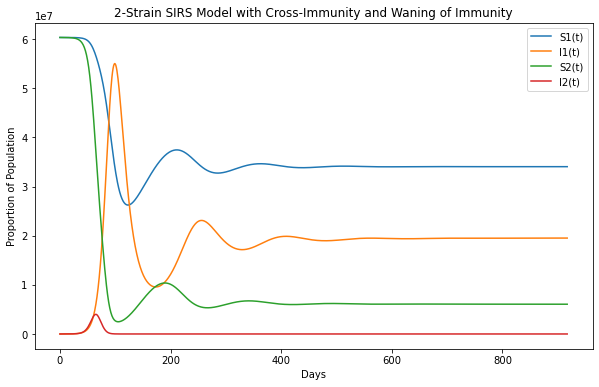

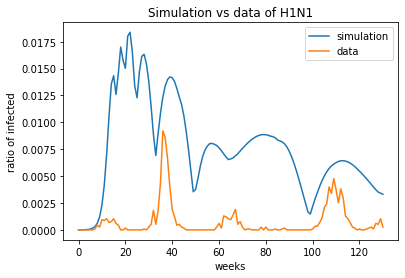

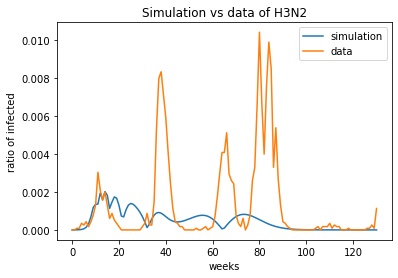

In [262]:
trials = []
for gamma1 in gamma1s:
    for gamma2 in gamma2s: 
        trial = odeint(SIRS, y0, t, args=(N, beta1, beta2, gamma1, gamma2, mu, c12, c21, L1,L2))
        S_1, I_1, R_1, S_2, I_2, R_2 = trial.T
        print("Gamma 1 is",gamma1,"gamma2 is",gamma2)
        plot_model(trial.T)
        inc1,inc2 = incidence(trial.T[1],trial.T[4])
        compare(inc1,inc2)


In [263]:
gamma1 = 0.15375
gamma2 = 0.26

L1 is 3.0 L2 is 1.0 years


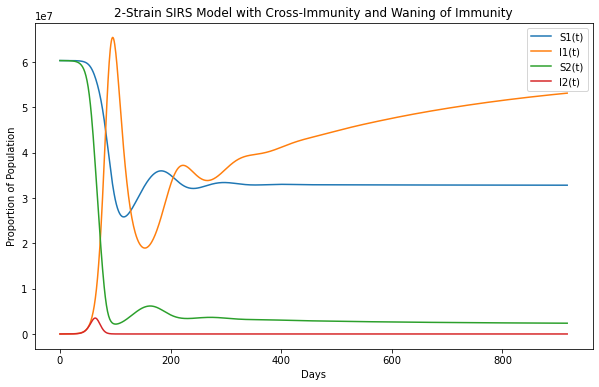

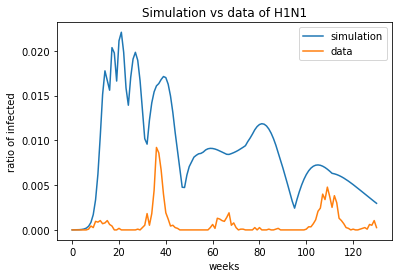

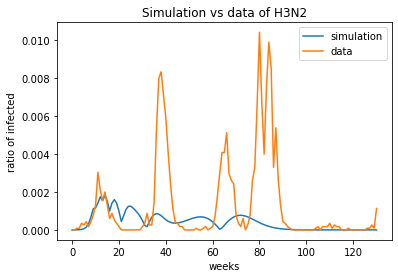

L1 is 3.0 L2 is 2.0 years


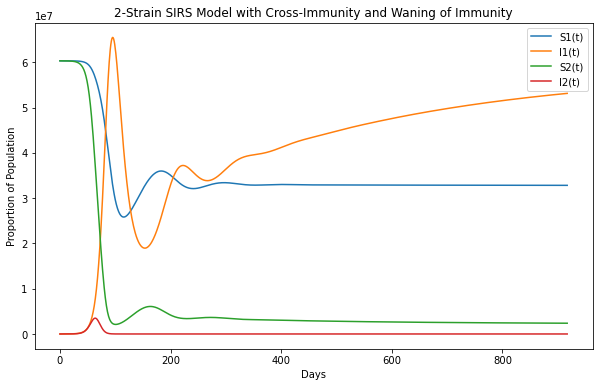

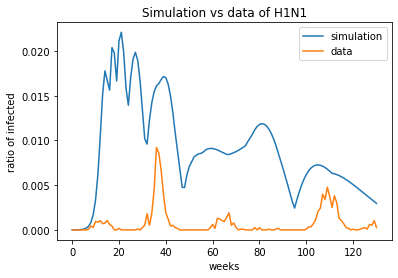

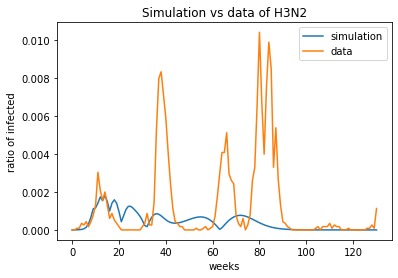

L1 is 3.0 L2 is 3.0 years


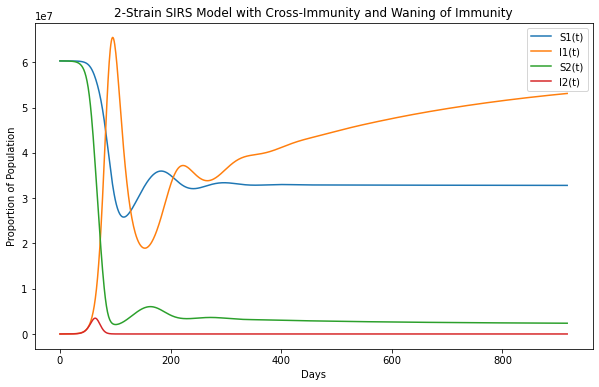

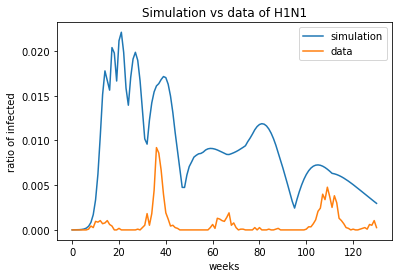

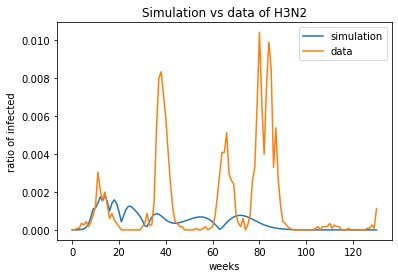

L1 is 3.0 L2 is 4.0 years


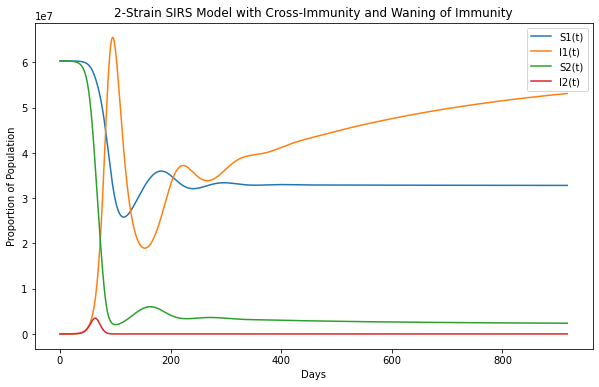

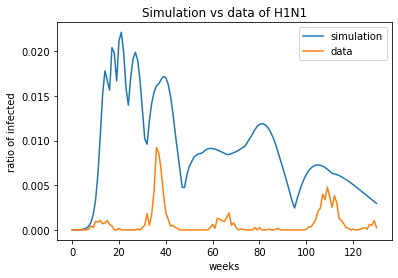

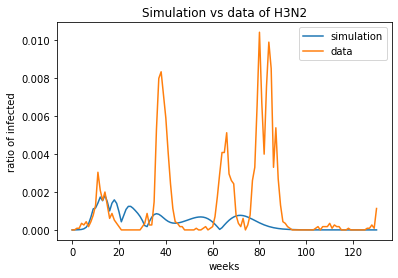

L1 is 3.0 L2 is 5.0 years


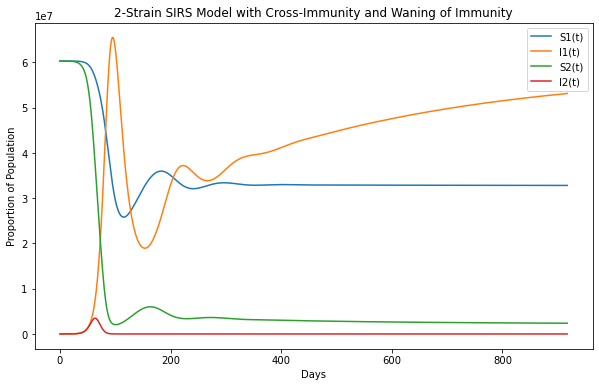

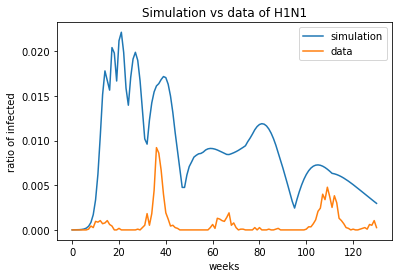

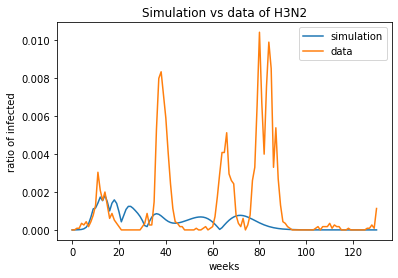

L1 is 4.0 L2 is 1.0 years


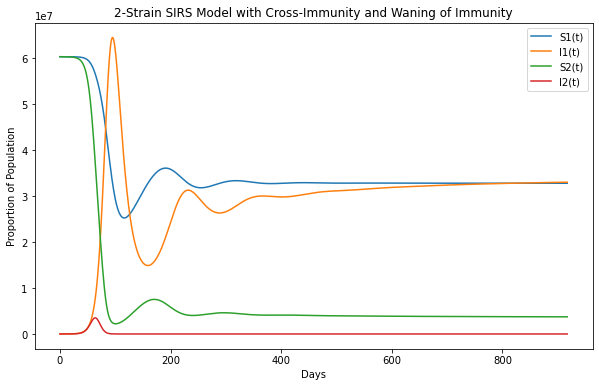

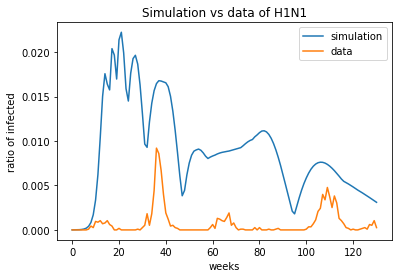

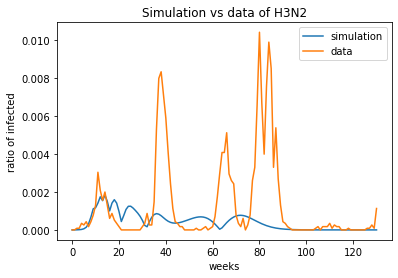

L1 is 4.0 L2 is 2.0 years


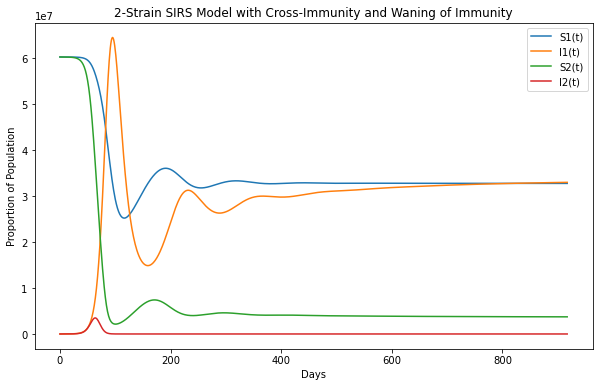

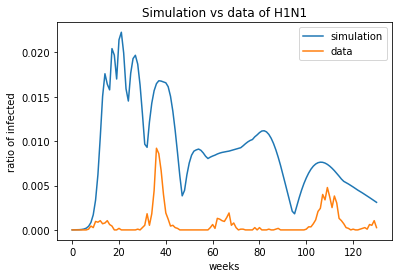

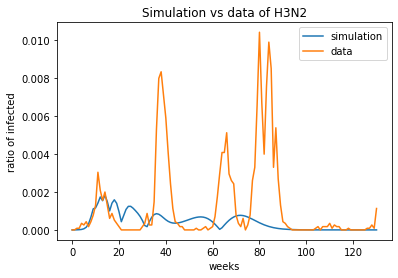

L1 is 4.0 L2 is 3.0 years


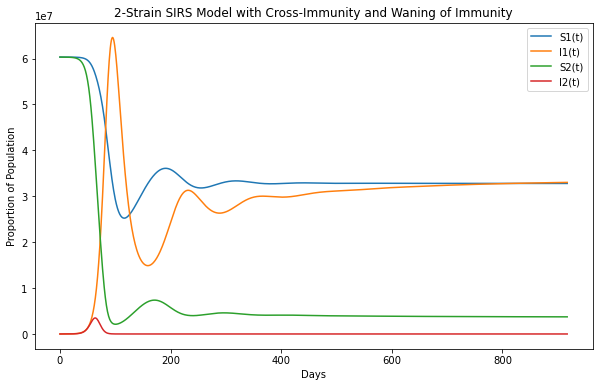

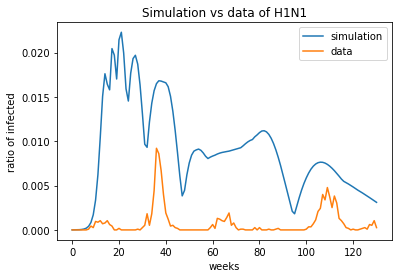

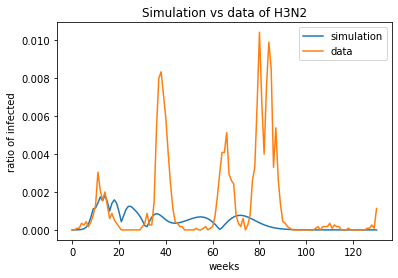

L1 is 4.0 L2 is 4.0 years


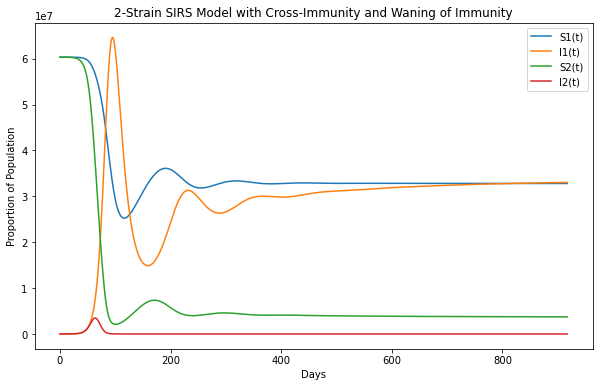

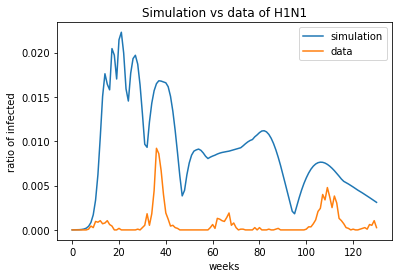

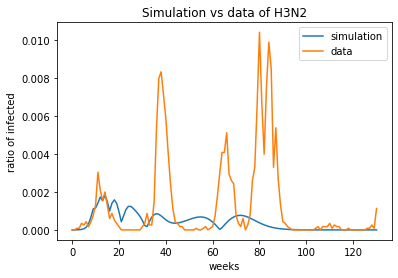

L1 is 4.0 L2 is 5.0 years


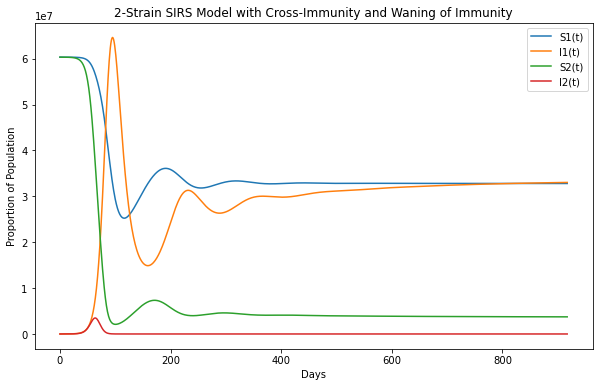

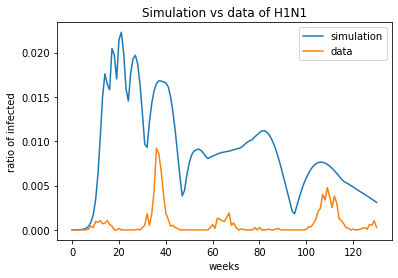

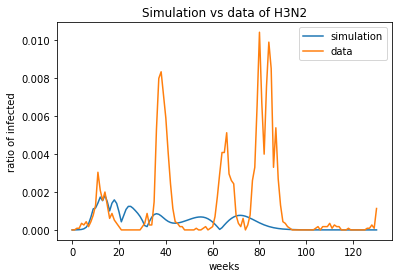

L1 is 5.0 L2 is 1.0 years


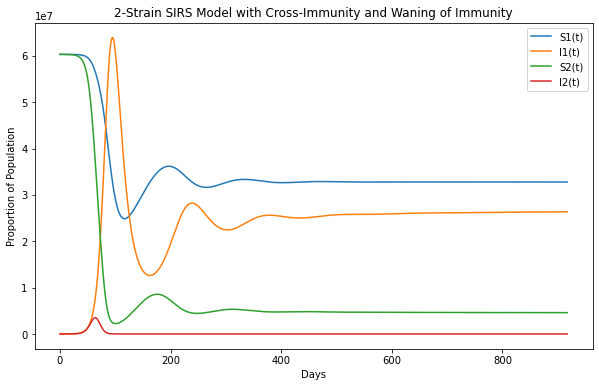

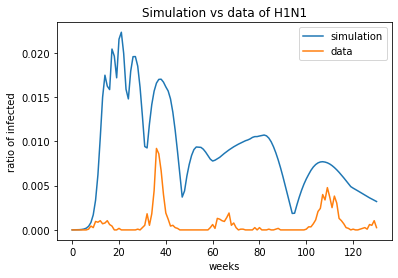

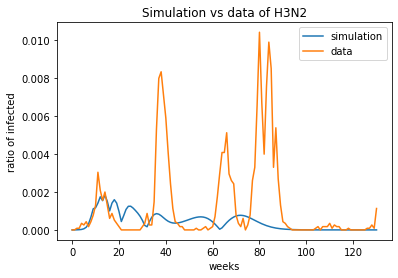

L1 is 5.0 L2 is 2.0 years


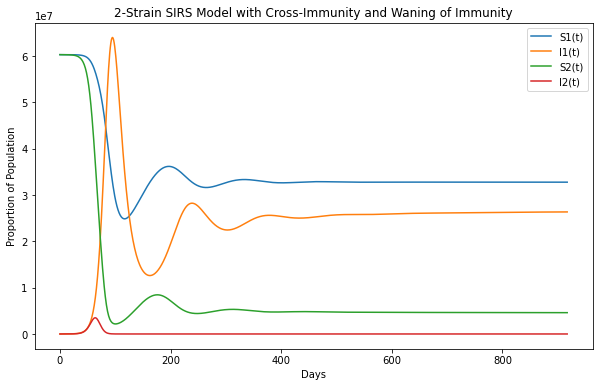

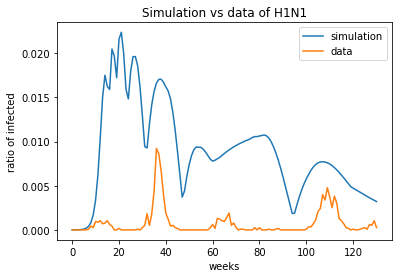

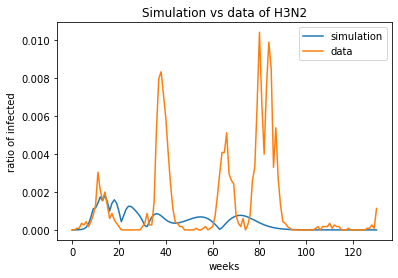

L1 is 5.0 L2 is 3.0 years


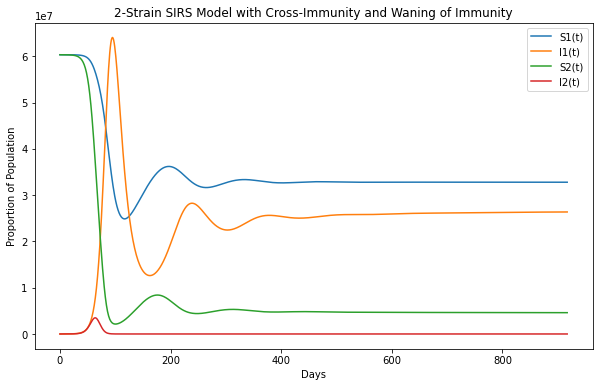

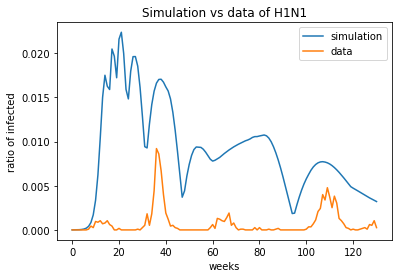

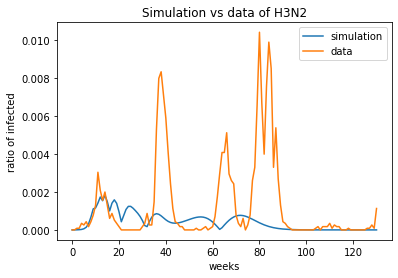

L1 is 5.0 L2 is 4.0 years


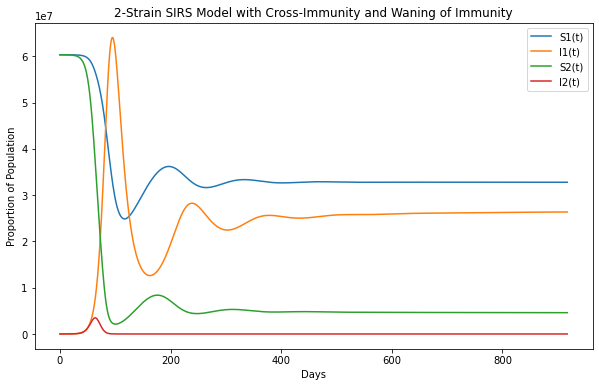

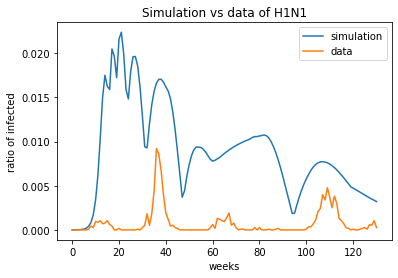

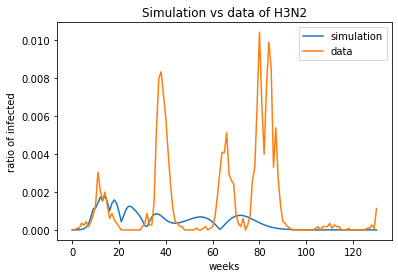

L1 is 5.0 L2 is 5.0 years


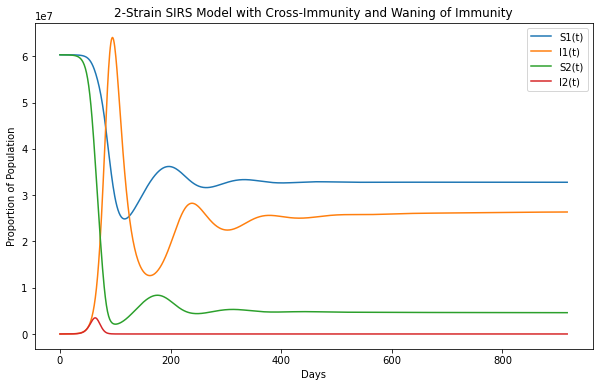

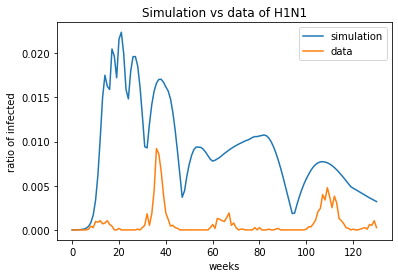

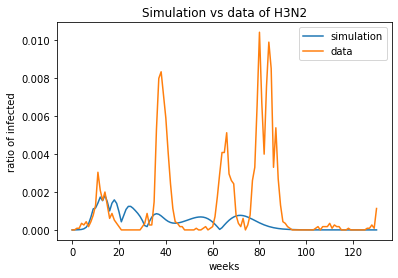

L1 is 6.0 L2 is 1.0 years


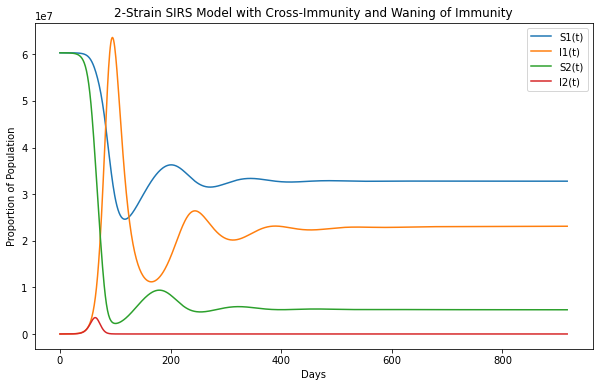

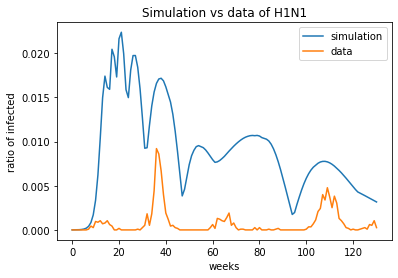

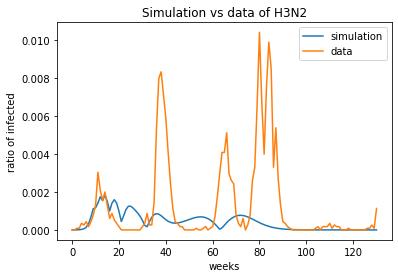

L1 is 6.0 L2 is 2.0 years


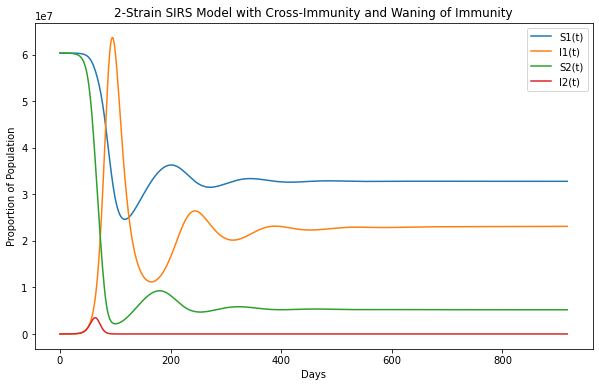

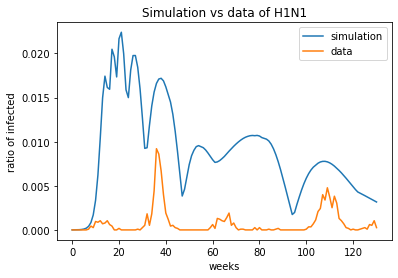

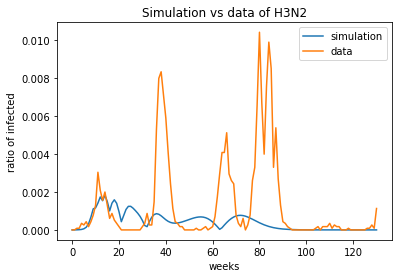

L1 is 6.0 L2 is 3.0 years


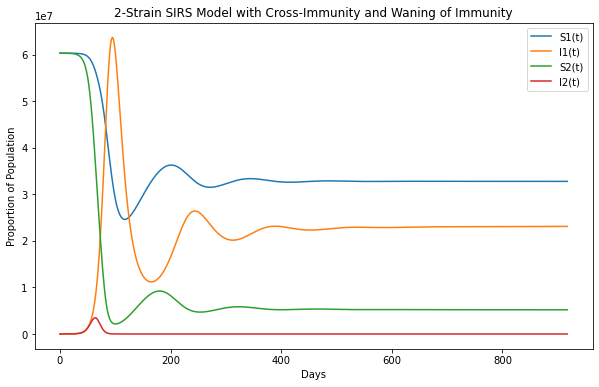

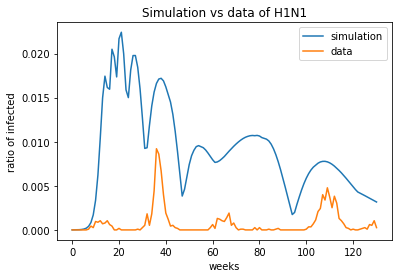

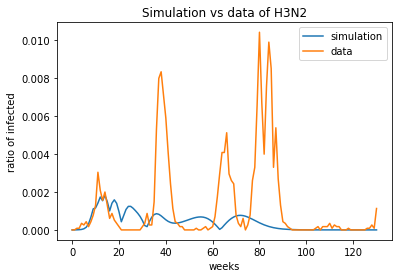

L1 is 6.0 L2 is 4.0 years


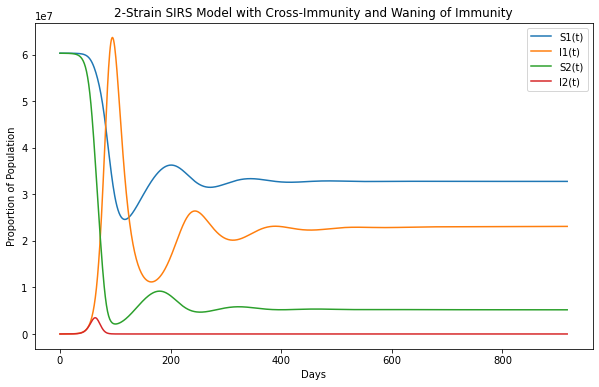

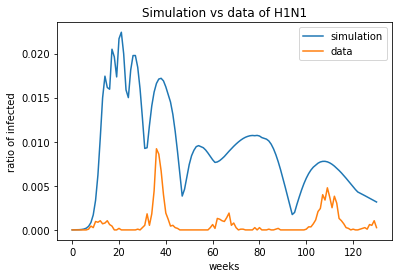

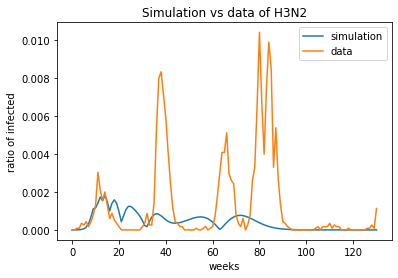

L1 is 6.0 L2 is 5.0 years


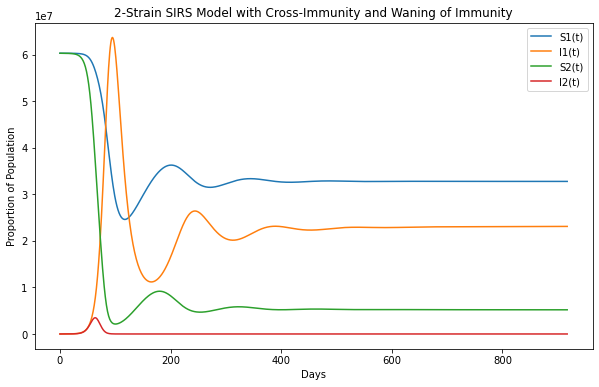

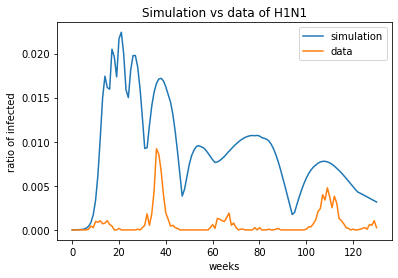

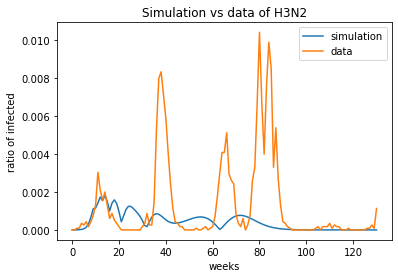

L1 is 7.0 L2 is 1.0 years


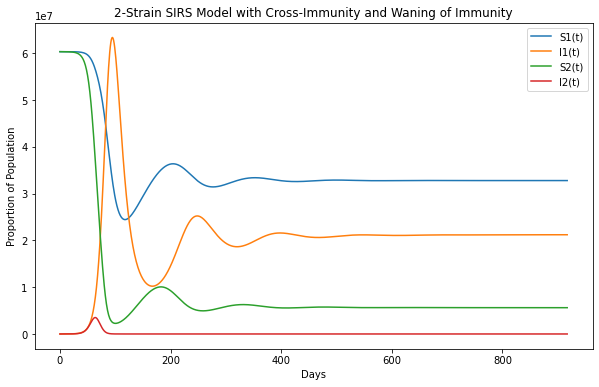

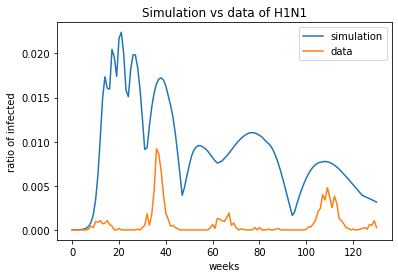

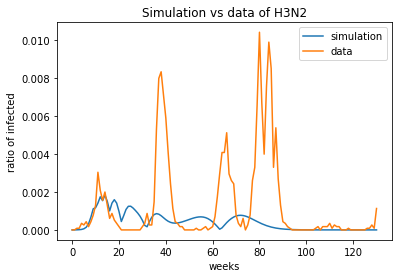

L1 is 7.0 L2 is 2.0 years


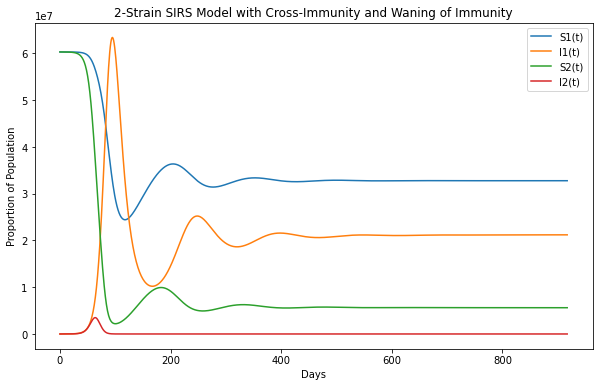

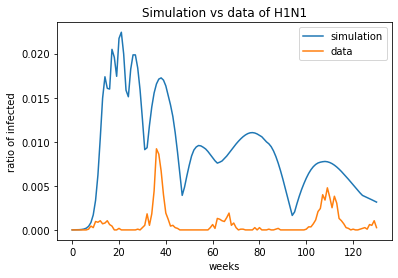

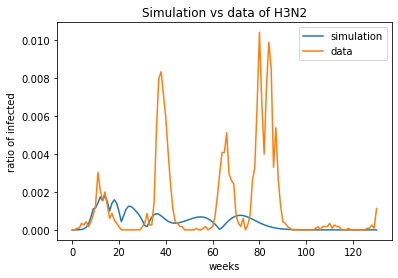

L1 is 7.0 L2 is 3.0 years


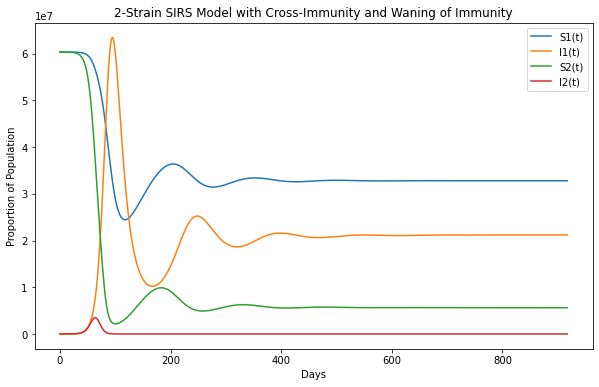

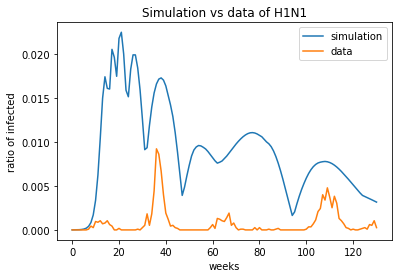

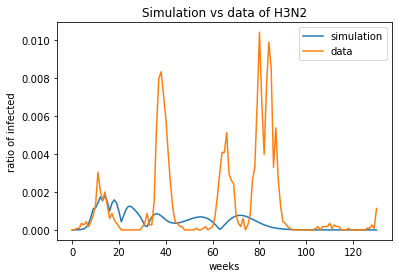

L1 is 7.0 L2 is 4.0 years


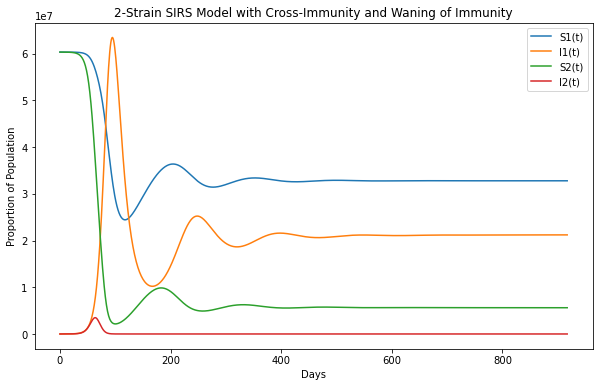

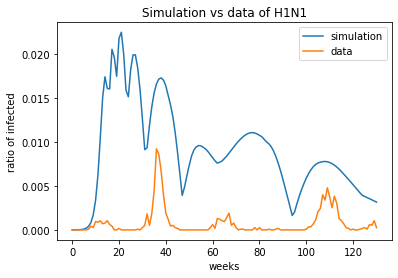

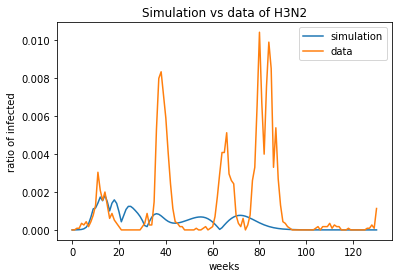

L1 is 7.0 L2 is 5.0 years


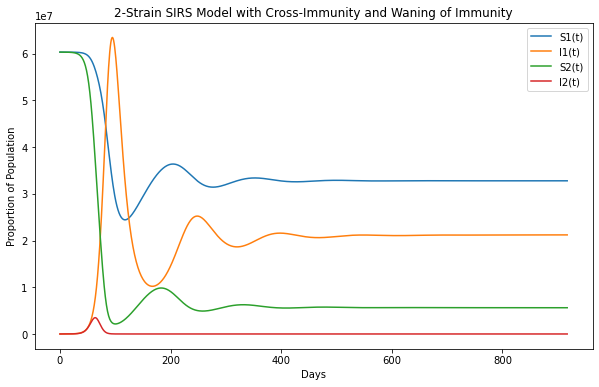

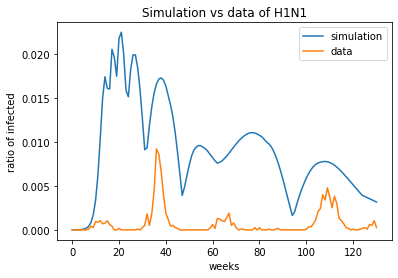

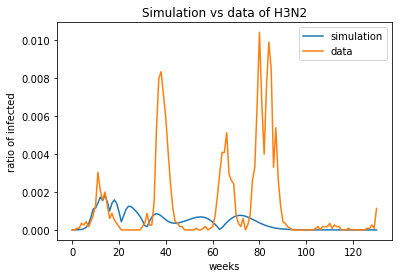

In [264]:
trials = []
for L1 in L1s:
    for L2 in L2s: 
        trial = odeint(SIRS, y0, t, args=(N, beta1, beta2, gamma1, gamma2, mu, c12, c21, L1,L2))
        S_1, I_1, R_1, S_2, I_2, R_2 = trial.T
        print("L1 is",L1/360,"L2 is",L2/360,"years")
        plot_model(trial.T)
        inc1,inc2 = incidence(trial.T[1],trial.T[4])
        compare(inc1,inc2)


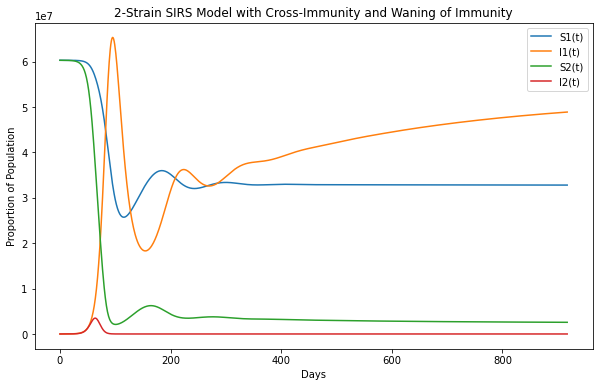

In [265]:
#no real difference, keep the suggestion in the paper
#final model 
sol = odeint(SIRS, y0, t, args=(N, beta1, beta2, gamma1, gamma2, mu, c12, c21, L_1,L_2))
S_1, I_1, R_1, S_2, I_2, R_2 = sol.T
plot_model(sol.T)

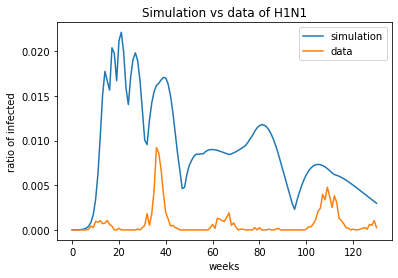

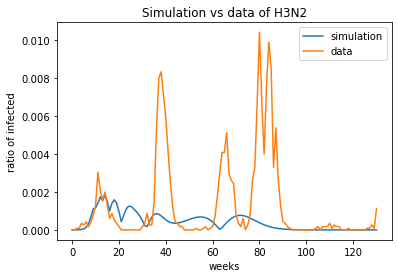

In [266]:
inc1,inc2 = incidence(I_1,I_2)
compare(inc1,inc2)